<a href="https://colab.research.google.com/github/pamolowo/Hamoye_data_science/blob/main/Machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="color:#19180F; font-size:20px; font-weight:700; padding:10px;text-align: center; border: 5px solid #19180F;" >
  <div style = "margin: auto">  
<p style = "text-align: center;">ASSESSMENT - CT7205- MACHINE LEARNING AND OPTIMIZATION </p>
<img src = "./University-of-gloucestershire.png"/>
<p style = "text-align: center;">OLOWOJEBUTU PAMELA</p>
<p style = "text-align: center;">S4308522</p>
<p style = "text-align: center;">Course Instructor: Dr. Bhupesh Mishra</p>
  </div>
</div>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!pip install statsmodels
!pip install lightgbm
!pip install catboost
!pip install shap
!pip install joblib
!pip install tensorflow
!pipinstall plotly
!pip install xgboost



'pipinstall' is not recognized as an internal or external command,
operable program or batch file.



<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
# INTRODUCTION

This dataset contains information about individuals, their demographics, and their medical costs. It has 1,338 rows with the following columns:

* Age: This is an integer variable ranging from 18 to 64 years.
* Sex: This is a categorical variable with two categories - male and female.
* BMI (Body Mass Index): This is a float variable typically ranging between 15 and 53, representing the individual's BMI.
* Children: This is an integer variable representing the number of children the individual has, ranging from 0 to 5.
* Smoker: This is a categorical variable with two categories - yes and no, indicating whether the individual smokes.
* Region: This is a categorical variable with four regions - northeast, southeast, southwest, and northwest.
* Medical Cost: This is a continuous float variable representing the medical expenses incurred by the individual.

# Type of ML and Best Task
The required ML is supervised learning because we have labeled data (medical costs). The best ML task is regression analysis because we need to predict a continuous variable (medical costs).

### Why Regression is the best-fit task


* Predicting Continuous Values: Regression is designed to handle continuous output variables, making it ideal for predicting medical costs, which are numerical and continuous.
* Handling Multiple Predictors: Regression models can incorporate multiple predictor variables, allowing us to use all the relevant features in the dataset to improve the accuracy of predictions.
* Interpretability: Regression models, especially linear regression, provide coefficients that can be interpreted to understand the relationship between each predictor and the target variable.
<div/>


#### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, train_test_split
import plotly.express as px
import plotly.graph_objects as go

from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from IPython.display import display
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score, confusion_matrix
import warnings



warnings.filterwarnings('ignore')




#### Import and view the data set

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Explore the dataset

In [ ]:
# How many rows does the dataset have
num_rows = len(df)
print(num_rows)

1338


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'medicalCost'], dtype='object')

In [ ]:
# What are the column titles of the input variables?

input_cols = [x for x in df.columns if x != 'medicalCost']

input_cols

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Understanding the dataset

In [ ]:
df.isna().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [ ]:
df.nunique()

age              47
sex               2
bmi             548
children          6
smoker            2
region            4
medicalCost    1337
dtype: int64

In [ ]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [ ]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
From the outputs above, the data has three categorical columns. While smoker and sex has 2 unique values, region has 4. This information will enable carry out encoding on the data before running the models. Next, there is need to known the correlation between variables in the dataset
</div>

<div style="color:#19180F; font-size:20px;  font-weight: 700; padding:10px; border: 5px solid #19180F;">
Visualise the data
</div>

<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    <p style="color:#19180F; font-size:20px;  font-weight: 700;">Correlation Matrix</p>
    This section explores the relationship between the target variable(medical cost) with the other independent variables. The following methods have been deployed below:
    <ul>
        <li>absolute pearson correlation coefficent</li>
    </ul>
    <p style="color:#19180F; font-size:20px;  font-weight: 700;">Visualization techniques include:</p>
    <ul>
        <li> heatmaps </li>
         <li> scatter plot matrices</li>
         <li> histograms</li>
         <li> box plots</li>
         <li> line plot</li>
    </ul>
 to provide insight to the data
</div>

In [ ]:
continous=["age","bmi","medicalCost"]

In [ ]:
corr = df[continous].corr()
corr

,age,bmi,medicalCost
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
medicalCost,0.298308,0.198401,1.000000


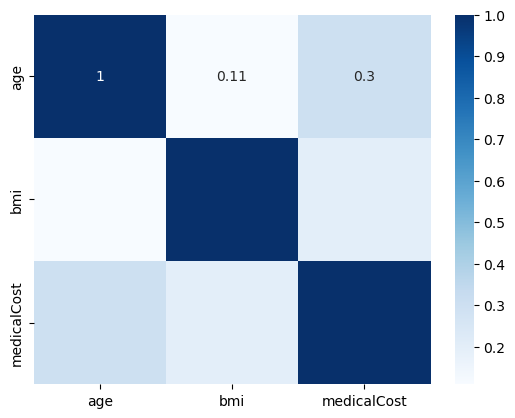

In [ ]:
sns.heatmap(corr,cmap="Blues",annot=True)
plt.show()

<Axes: >

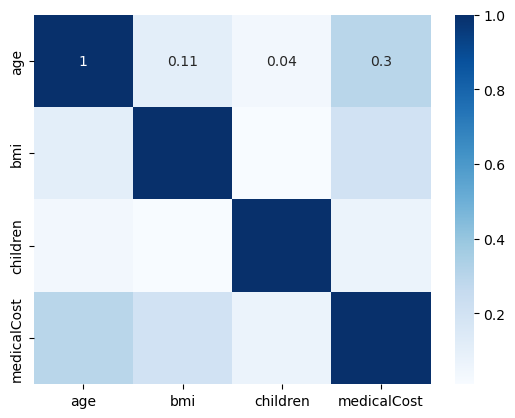

In [ ]:
numeric = df[["age", "bmi", "children", "medicalCost"]]
corr = numeric.corr().round(decimals = 2).abs()
sns.heatmap(corr, cmap="Blues", robust=True, annot = True)

In [ ]:
corr

,age,bmi,children,medicalCost
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
medicalCost,0.30,0.20,0.07,1.00


<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
The plots above show the correlation between the numeric or continous variables.The goal is to see how well these data correlate with the medical costs(target).
    
<b>Diagonal Elements</b>:
The diagonal elements are all 1.000000, indicating that each variable is perfectly correlated with itself.

<b>Age and BMI (0.109344)</b>:
The correlation coefficient between age and BMI is 0.109344. This value indicates a very weak positive correlation, suggesting that BMI slightly tends to increase as age increases, but this relationship is not strong.

<b>Age and Medical Cost (0.298308)</b>:
The correlation coefficient between age and medical cost is 0.298308. This indicates a moderate positive correlation, suggesting that medical costs tend to increase moderately as age increases.

<b>BMI and Medical Cost (0.198401)</b>:
The correlation coefficient between BMI and medical cost is 0.198401. This shows a weak positive correlation, indicating that higher BMI is associated with higher medical costs, but the relationship is relatively weak.

<b>Analysis</b>
The correlation matrix provides insights into the relationships between age, BMI, and medical costs.
Age has a moderate positive correlation with medical costs, suggesting that older individuals tend to have higher medical costs.
BMI also has a positive correlation with medical costs, though the relationship is weaker.
These insights are useful for understanding how different factors contribute to medical expenses and can be leveraged in predictive modelling and health care planning.
<div/>

#### Scatter Plot Matrices
* diagonal: univariate distributions
* off-diagonal: bivariate distributions

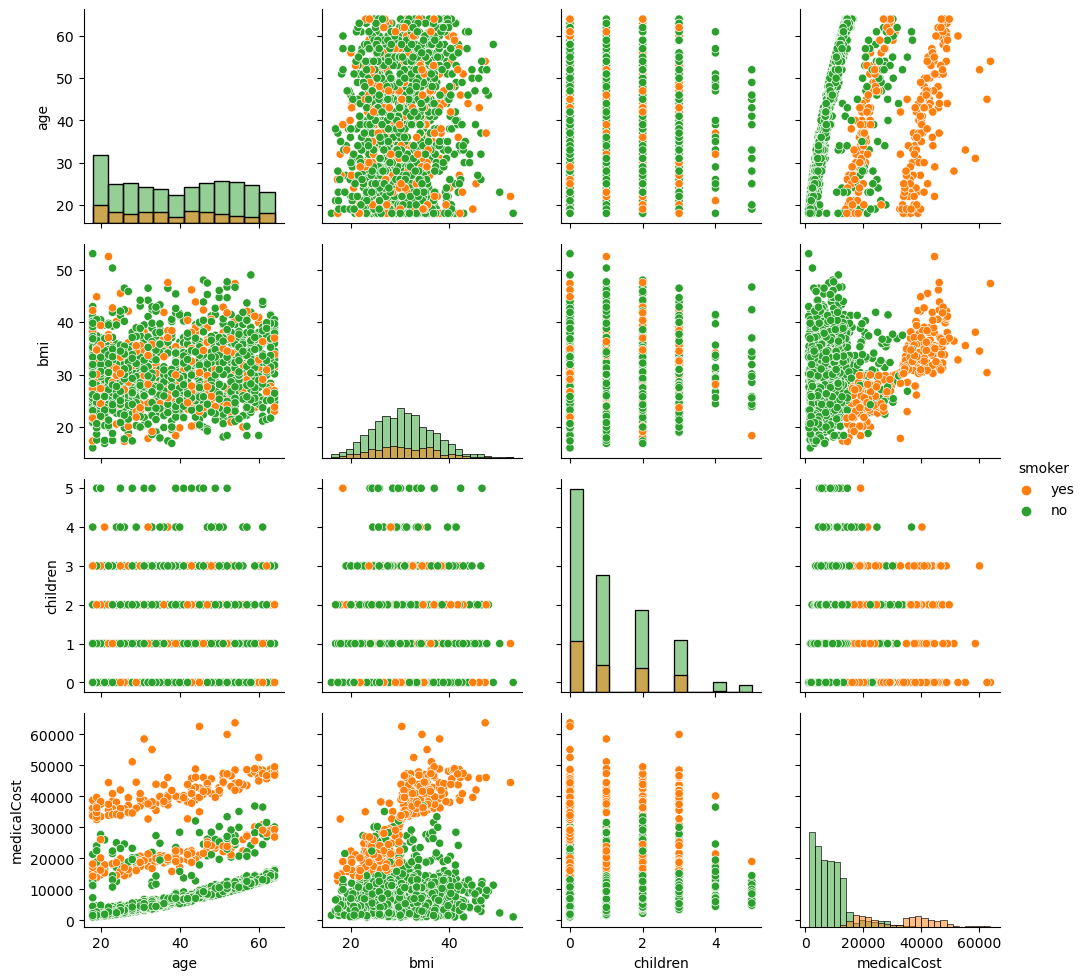

In [ ]:
g = sns.PairGrid(df, hue="smoker", palette=["C1", "C2"])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    
### ANALYSIS OF CORRELATION OF MEDICAL COST WITH OTHER VARIABLES
Age:

Age has a moderate positive correlation (0.30) with medical costs, suggesting that older individuals tend to incur higher medical costs.
There is a weak positive correlation (0.11) between age and BMI.
The correlation between age and the number of children is very weak (0.04).
BMI:

BMI has a weak positive correlation (0.20) with medical costs, indicating that individuals with higher BMI tend to have slightly higher medical costs.
The correlation between BMI and the number of children is negligible (0.01).
Children:

The number of children has a very weak positive correlation (0.07) with medical costs, suggesting a minimal impact on medical costs.
Explanation of the Pairplot
The pairplot visualizes the relationships between pairs of variables in the dataset. It includes scatter plots for each pair of variables and histograms for individual variables.

Key Observations from the Pairplot:
Age vs. Medical Costs:

There is a noticeable trend where medical costs increase with age. This is consistent with the moderate positive correlation (0.30) observed in the correlation matrix.
Smokers (orange dots) generally have higher medical costs compared to non-smokers (green dots).
BMI vs. Medical Costs:

Higher BMI values are associated with higher medical costs, although the relationship is not very strong (correlation of 0.20).
Smokers again tend to incur higher medical costs than non-smokers across different BMI levels.
Children vs. Medical Costs:

The number of children does not show a strong relationship with medical costs, as seen in the weak correlation (0.07). The distribution is more scattered.
Distributions:

The histograms along the diagonal show the distribution of each variable. For example, the age distribution is slightly skewed towards younger individuals, while medical costs show a right-skewed distribution with most costs concentrated at the lower end but a long tail extending to higher costs.
Smoking Status:

The color coding (orange for smokers and green for non-smokers) highlights the impact of smoking on medical costs. Smokers tend to have higher medical costs, evident in the clusters of orange dots at higher cost values in the medicalCost plots.
Conclusion
The correlation matrix and pairplot together provide a comprehensive view of the relationships between age, BMI, number of children, and medical costs. The visualizations confirm that age and BMI have a positive relationship with medical costs, with smoking status further amplifying these costs. The number of children has a minimal impact on medical costs.
</div>

In [ ]:
print("Median:\t\t", np.percentile(df["medicalCost"], 50))
print("90%-quantile:\t", np.percentile(df["medicalCost"], 90))

Median:		 9386.1613
90%-quantile:	 34832.7416


<Axes: ylabel='medicalCost'>

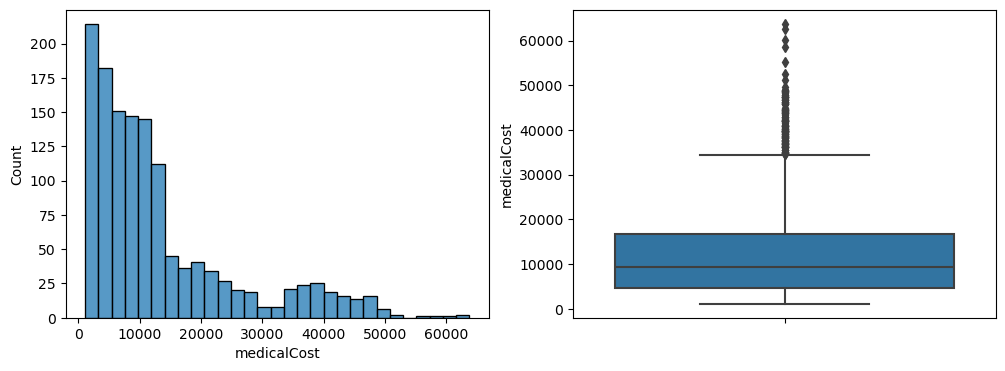

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x=df["medicalCost"], ax=ax[0])
sns.boxplot(y=df["medicalCost"], ax=ax[1])

<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
These plots provide a visual representation of the distribution of medical costs in the dataset.

<b>Histogram(left plot)</b>

Distribution: The histogram shows that most medical costs are concentrated at the lower end,
with a significant number of individuals incurring medical costs below $10,000.
Right Skewness: The distribution is right-skewed, indicating that while most individuals have lower medical costs,
there is a long tail extending towards higher costs, with fewer individuals incurring very high medical expenses.
Outliers: The right tail suggests the presence of outliers with very high medical costs.

<b>Boxplot (Right Plot)</b>

Median: The median medical cost is approximately `$9386.16`, indicating that half of the individuals have medical costs below this value.
90% Quantile: The 90th percentile of medical costs is approximately `$34832.74`, meaning that 90% of the individuals have medical costs below this value,
and only 10% have costs above this amount.`

<b>Conclusion</b>
The histogram and boxplot together provide a comprehensive view of the distribution of medical costs.
The data is heavily skewed towards lower costs with a few high-cost outliers.
This visualization helps in understanding the variability and central tendency of medical expenses in the dataset.

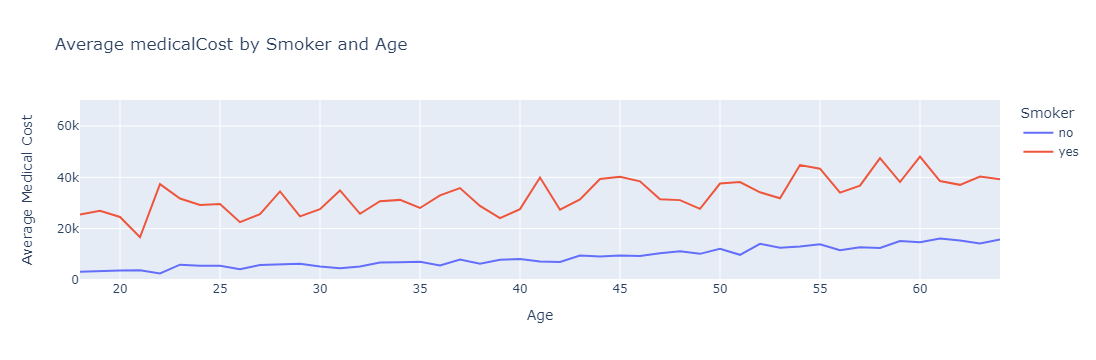

Average medicalCost for smokers regardless of age $ 32050.23
Average medicalCost for non-smokers regardless of age $ 8440.66


In [ ]:

%matplotlib inline
# Average charges by smoker status and age
avg_charges = df.groupby(['smoker', 'age'], observed=False)['medicalCost'].mean().reset_index()

# Line plot
fig = px.line(avg_charges, x='age', y='medicalCost', color='smoker', title='Average medicalCost by Smoker and Age',
              labels={'medicalCost': 'Average Medical Cost', 'age': 'Age', 'smoker': 'Smoker'})

# Update the y-axis range and adjust the figure height
fig.update_layout(yaxis_range=[0, df['medicalCost'].max() * 1.1])

fig.show()



print("Average medicalCost for smokers regardless of age $", round(df[df['smoker'] == 'yes']['medicalCost'].mean(),2))
print("Average medicalCost for non-smokers regardless of age $", round(df[df['smoker'] == 'no']['medicalCost'].mean(),2))

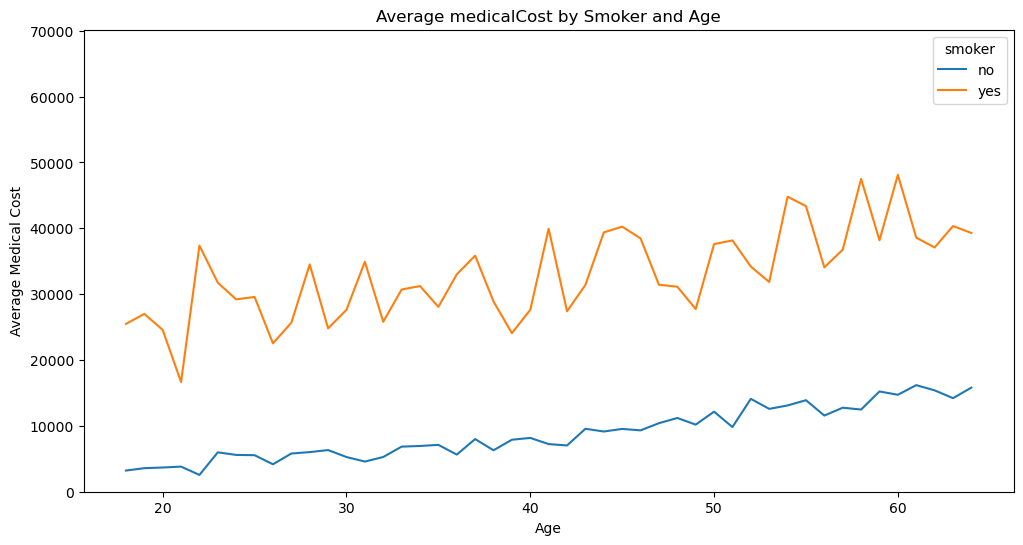

Average medicalCost for smokers regardless of age $ 32050.23
Average medicalCost for non-smokers regardless of age $ 8440.66


In [ ]:
# Group by smoker and age, calculate the mean of medicalCost, and reset index
avg_charges = df.groupby(['smoker', 'age'], observed=False)['medicalCost'].mean().reset_index()

# Line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_charges, x='age', y='medicalCost', hue='smoker')
plt.title('Average medicalCost by Smoker and Age')
plt.xlabel('Age')
plt.ylabel('Average Medical Cost')
plt.ylim(0, df['medicalCost'].max() * 1.1)
plt.show()

# Print average medical cost for smokers and non-smokers regardless of age
print("Average medicalCost for smokers regardless of age $", round(df[df['smoker'] == 'yes']['medicalCost'].mean(), 2))
print("Average medicalCost for non-smokers regardless of age $", round(df[df['smoker'] == 'no']['medicalCost'].mean(), 2))


<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    
### Medical Costs for Smokers vs. Non-Smokers:

Smokers (orange line) generally incur significantly higher medical costs compared to non-smokers (blue line) across all age groups.
The average medical cost for smokers is `$32,050.23`, whereas for non-smokers, it is `$8,440.66`. This indicates that smoking has a substantial impact on medical expenses.
Trend with Age:

For both smokers and non-smokers, medical costs tend to increase with age.
However, the increase in medical costs with age is more pronounced for smokers, with more variability and higher peaks in costs as age increases.
Variability in Costs:

The plot shows more variability in medical costs for smokers across different ages, with costs fluctuating more widely than for non-smokers.
Additional Insights:
The plot effectively highlights the impact of smoking on medical expenses, showing a clear distinction in costs between smokers and non-smokers.

</div>

<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    
## Medical cost vs. Children
### The number of children doesn't seem to tell a lot about the medical charges
Medical Costs Across Children:
There is no significant trend observed in medical costs with varying numbers of children. The median medical costs and the spread of the data (IQR) do not show a strong correlation with the number of children.
The number of children does not seem to have a substantial impact on the medical costs.
</div>

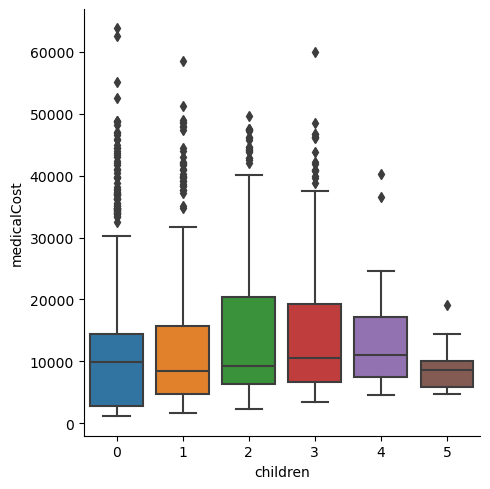

In [ ]:
sns.catplot(x="children", y="medicalCost", kind="box", data=df)

## Medical cost vs. BMI
 The BMI alone is only weakly correlated with the medical costs:
 For smokers, however, a higher BMI clearly coincides with higher medical costs

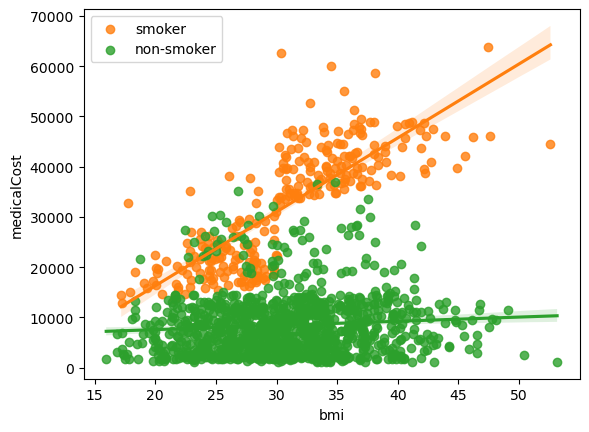

In [ ]:
sns.regplot(x=df["bmi"][df["smoker"] == "yes"], y=df["medicalCost"][df["smoker"] == "yes"], color="C1", label="smoker")
sns.regplot(x=df["bmi"][df["smoker"] == "no"], y=df["medicalCost"][df["smoker"] == "no"], color="C2", label="non-smoker")
plt.legend()

<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    

Only people from 18 to 64 years old --> no retired persons captured, working-age population.
Over proportionally more data of young people (age 18-22) captured



The median medical costs appear relatively consistent regardless of the number of children.
The spread of medical costs is larger for families with 2 and 3 children, indicating higher variability.
Outliers are present in all categories, but more prominently in families with 2 children.

Plot 2: Regression Plot of BMI vs Medical Costs for Smokers and Non-Smokers

This scatter plot shows the relationship between BMI and medical costs, differentiated by smoking status. The orange points and regression line represent smokers, while the green points and line represent non-smokers.

Key Insights:

Smokers generally have higher medical costs than non-smokers, as shown by the higher position of the orange regression line.
There is a positive correlation between BMI and medical costs for both smokers and non-smokers. However, the slope is steeper for smokers, indicating that the increase in medical costs with BMI is more significant for smokers.
The data points are more spread out for smokers, indicating greater variability in medical costs compared to non-smokers.
Clusters Identified:
* Cluster 0: Non-smokers with low medical costs.
* Cluster 1: Mixed group of smokers and non-smokers with medium medical costs.
* Cluster 2: Smokers with high medical costs.
These visualizations help identify and understand the impact of smoking and BMI on medical costs, highlighting that smokers incur significantly higher medical expenses, especially as BMI increases.
</div>

## Medical costs vs. Age

<Axes: xlabel='age', ylabel='medicalCost'>

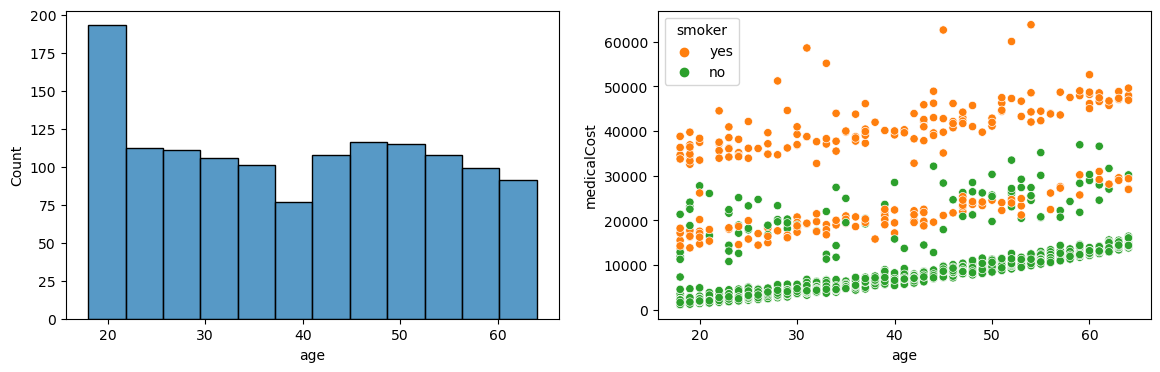

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(x=df["age"], ax=ax[0])
sns.scatterplot(x="age", y="medicalCost", hue="smoker",  data=df, palette=["C1", "C2"], ax=ax[1])


<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">

## Relation between medical cost and age    
The image provided contains two plots that visualize data regarding age and medical costs, with a focus on the impact of smoking status.

Histogram of Age Distribution (Left Plot):

Description: This histogram shows the distribution of ages within the dataset.

Interpretation: The histogram is divided into age bins. The highest count is observed in the 20-25 age range, with relatively even distribution across other age ranges. This indicates a higher number of individuals in their early twenties compared to other ages in the dataset.

Scatter Plot of Age vs. Medical Costs with Smoking Status (Right Plot):

Description: This scatter plot depicts the relationship between age and medical costs, coloured by smoking status.

Colour/Hue (smoker): The smoking status is represented by two colours: orange for smokers and green for non-smokers.
Interpretation: The scatter plot reveals that smokers (orange dots) generally have higher medical costs compared to non-smokers (green dots) across all age groups. This trend is especially pronounced at higher cost levels, where almost all high medical costs are associated with smokers. Additionally, there is a slight upward trend in medical costs with increasing age for both smokers and non-smokers, but the costs for smokers are consistently higher.
These plots provide a clear visual representation of how age and smoking status affect medical costs, emphasizing the significant impact of smoking on increasing medical expenses.
</div>

## Medical cost vs. Smoker and Sex

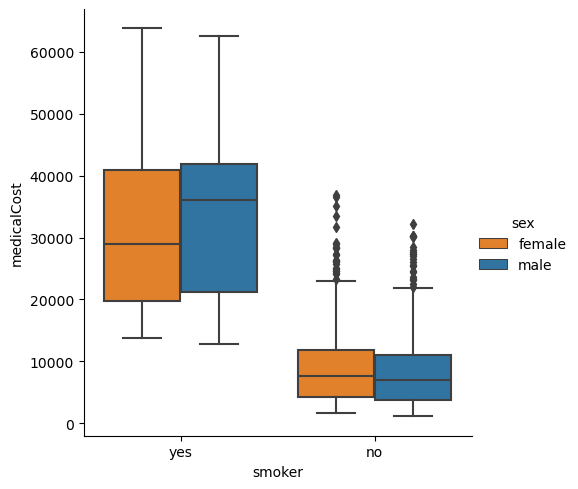

In [ ]:
sns.catplot(x="smoker", y="medicalCost", kind="box", hue="sex",  data=df, palette=["C1", "C0"])


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Relationship between Medical cost, Sex and Smoking status
    
The plot uses orange for females and blue for males to distinguish between sexes.

**Smokers vs. Non-Smokers:**
- Both male and female smokers have significantly higher medical costs compared to non-smokers.
- Smokers exhibit a wider interquartile range (IQR), indicating greater variability in costs among smokers.
- Non-smokers generally have lower medical costs, with shorter box plots indicating lower variability.

**Gender Differences:**
- Among smokers, both males and females have similar distributions of medical costs, but males tend to have slightly higher costs.
- Among non-smokers, males also tend to have slightly higher medical costs than females, although the difference is less pronounced compared to smokers.

**Key Insights:**
- Smoking status strongly correlates with increased medical expenses, regardless of gender.
- While there are differences in medical costs between genders, smoking has a more significant impact on cost increases.
</div>


# DATA PREPROCESSING

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
## Changing categorical values to numeric
- This is an important step as many machine learning algorithms are unable to support categorical values.
- There are 2 ways we can deal with this:
    - Label encoding
    - One-hot encoding
  ### Label encoding (Ordinal values)
Label encoding assigns each unique value to a different integer.

### One-hot encoding
- One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.
</div>

In [ ]:
# Changing categorical values to numeric
df1 = df.copy()
#sex
le = LabelEncoder()
le.fit(df1.sex.drop_duplicates())
df1.sex = le.transform(df1.sex)
# smoker or not
le.fit(df1.smoker.drop_duplicates())
df1.smoker = le.transform(df1.smoker)
#region
le.fit(df1.region.drop_duplicates())
df1.region = le.transform(df1.region)

one-hot encoding

In [ ]:
# Convert categorical variables to numerical using one hot encoding
df2 = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

In [ ]:
df2.head()

,age,bmi,children,medicalCost,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
columns_to_convert = ['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

for column in columns_to_convert:
    df2[column] = df2[column].astype(int)

In [ ]:
df2.head()

,age,bmi,children,medicalCost,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
print(df1.corr()['medicalCost'])

lm = ols('sex ~ medicalCost', data = df1).fit()
table = sm.stats.anova_lm(lm)
print("P-value for 1-way ANOVA test between sex and medicalCost is: ",table.loc['medicalCost','PR(>F)'])
lm1 = ols('smoker ~ medicalCost', data = df1).fit()
table1 = sm.stats.anova_lm(lm1)
print("P-value for 1-way ANOVA test between smoker and medicalCost is: ",table1.loc['medicalCost','PR(>F)'])
lm2 = ols('region ~ medicalCost', data = df1).fit()
table2 = sm.stats.anova_lm(lm2)
print("P-value for 1-way ANOVA test between region and medicalCost is: ",table2.loc['medicalCost','PR(>F)'])

age            0.298308
sex            0.058044
bmi            0.198401
children       0.067389
smoker         0.787234
region        -0.006547
medicalCost    1.000000
Name: medicalCost, dtype: float64
P-value for 1-way ANOVA test between sex and medicalCost is:  0.033820791995078286
P-value for 1-way ANOVA test between smoker and medicalCost is:  1.4067220949355399e-282
P-value for 1-way ANOVA test between region and medicalCost is:  0.8109863197231106


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## ANALYSIS OF ANOVA(ANALYSIS OF VARIANCE) USING OLS(ORDINARY LEAST SQUARES)
    
Ordinary Least Squares (OLS) regression is used to fit the model for sex, smoker, and region against medicalCost.
ANOVA (Analysis of Variance) tests are conducted to determine the statistical significance of the relationships.


Why Use Label Encoding Instead of One-Hot Encoding

Efficiency:

Label Encoding assigns a single integer value to each category, making it more space-efficient.

One-Hot Encoding creates multiple binary columns (one for each category), which can significantly increase the dimensionality, especially with features like region which might have many unique values.

Applicability to ANOVA:

For ANOVA tests, Label Encoding is sufficient as it converts categorical variables to numeric labels, allowing the statistical models to work effectively.

Ordinal Nature:

If the categorical variables have an inherent order (even if not in this case), Label Encoding preserves this order, which can be useful in some analyses.
Using Label Encoding here makes the data more compact and manageable while still allowing for effective statistical testing.
</div>

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## ANALYSIS FOR PEARSONS CORRELATION    
- Here, I performed a Pearson correlation test and a 1-way ANOVA test. 1-way AVOVA test is the right way to test correlation between a categorical and numerical data.
  The results of the correlation coefficients are explained below

The correlation coefficients measure the strength and direction of the linear relationship between each feature and the medical costs (medicalCost).
Here are the coefficients for each feature:
- age: 0.298308
- sex: 0.058044
- bmi: 0.198401
- children: 0.067389
- smoker: 0.787234 (highest positive correlation)
- region: -0.006547 (weak negative correlation)

Interpretation:

The strongest positive correlation is with smoker, indicating that smoking status has a significant impact on medical costs.
Other features (such as age, bmi, and children) also contribute positively, but to a lesser extent.

P-values for ANOVA Tests:

ANOVA (Analysis of Variance) tests assess whether there are statistically significant differences in means across different groups.
Here are the p-values for the 1-way ANOVA tests:
Between sex and medicalCost: 0.0338 (p-value < 0.05 indicates a significant difference)
Between smoker and medicalCost: 1.41e-282 (extremely low p-value, highly significant)
Between region and medicalCost: 0.81099 (p-value > 0.05, no significant difference)

Interpretation:

The p-value for smoker is exceptionally low, confirming that smoking status significantly affects medical costs.
The p-value for sex is also below 0.05, suggesting a significant difference in costs between genders.
However, region does not show a significant impact on medical costs.
In summary, smoking status (smoker) is the most influential factor, followed by age (age), BMI (bmi), and having children (children). Gender (sex) also plays a role, while the region (region) seems less relevant.
</div>

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Summary of Pearson correlation:

* age and medicalCost: Weak positive correlation.
* bmi and medicalCost: Moderate positive correlation.
* children and medicalCost: Weak positive correlation.
* smoker and medicalCost: Strong positive correlation.
*sex and region have negligible correlation with medicalCost.
#### Conclusion:

Smoking status, BMI, and age have the highest correlations with medical costs.
</div>


In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    
## Simple Linear Regression Models
### Three best predictors:

* smoker
* bmi
* age
 </div>

In [ ]:

import pandas as pd
import statsmodels.api as sm



# Define predictors
predictors = ['smoker', 'bmi', 'age']

# Fit simple linear regression models
results = {}
for predictor in predictors:
    X = sm.add_constant(df1[predictor])
    y = df1['medicalCost']
    model = sm.OLS(y, X).fit()  # Correct function call
    results[predictor] = model.summary()

# Display results
for predictor in results:
    print('###################################################################################')
    print(f"Summary for {predictor}:\n", results[predictor])



###################################################################################
Summary for smoker:
                             OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2176.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.41e-282
Time:                        18:17:14   Log-Likelihood:                -13820.
No. Observations:                1337   AIC:                         2.764e+04
Df Residuals:                    1335   BIC:                         2.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

#### Evaluation Metrics    
* R-squared: To measure the goodness of fit.
* p-value: To check the statistical significance of the predictors.
</div>

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Analysis of Results
    
The output shows the results of Ordinary Least Squares (OLS) regression models for three predictors: smoker, bmi, and age. Here is a breakdown of each part of the analysis:

* Smoker
  
The model’s R-squared value of 0.620 indicates that approximately 62% of the variance in medical costs can be explained by the smoker variable. The adjusted R-squared value (Adj. R-squared) of 0.619, accounting for predictors, still suggests a good fit. Additionally, the high F-statistic value (2176) indicates statistical significance. The p-value for the F-test is very close to 0 (1.41e-282), providing strong evidence against the null hypothesis. The constant term coefficient (intercept) is 8440.6603, representing the baseline medical cost. Furthermore, the coefficient for the “smoker” variable indicates that being a smoker increases medical costs by 23610

* BMI
  
The R-squared value of 0.039 indicates that only 3.9% of the variance in medical costs can be explained by the BMI variable. The adjusted R-squared value (Adj. R-squared) remains at 0.039, suggesting minimal improvement after adjusting for predictors, which indicates a poor fit for the model. The F-statistic value of 54.70 is lower than the smoker model, indicating weaker statistical significance. However, the p-value for the F-test (2.47e-13) still suggests significance, albeit less impactful. Finally, the coefficients are as follows: the constant term (intercept) is 1202.1404 (representing the baseline medical cost), and each unit increase in BMI contributes 393.8559 to the medical cost.


* Age
  
The R-squared value of 0.089 indicates that approximately 8.9% of the variance in medical costs can be explained by the age variable. The adjusted R-squared value (Adj. R-squared) remains at 0.088, similar to the R-squared value, indicating a relatively poor fit for the model. The F-statistic value of 130.4 suggests that the model is statistically significant, although less so compared to the smoker model. The p-value for the F-test (6.98e-29) shows strong significance. Finally, the coefficients are as follows: the constant term (intercept) is 3190.0217 (representing the baseline medical cost), and each year increase in age contributes 257.2297 to the medical cost.


General Observations

R-squared Values:

The smoker variable has the highest R-squared value, indicating it is the most significant predictor among the three.
bmi and age have much lower R-squared values, indicating weaker relationships with medicalCost.
p-values:

All models show significant p-values (<0.05), indicating the predictors are statistically significant.
Coefficients:

smoker has the highest coefficient, showing a large impact on medicalCost.
bmi and age have smaller but still significant coefficients.

</div>

<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    
# Multivariate Regression Model
</div>

<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    
# Multivariate Regression Model : 3 Predictors
</div>

In [ ]:
# Ensure numerical columns are in the correct format
df1[['bmi', 'age', 'medicalCost']] = df1[['bmi', 'age', 'medicalCost']].apply(pd.to_numeric)

# Check for missing values
if df1.isnull().values.any():
    df1 = df1.dropna()

# Define predictors
X = sm.add_constant(df1[['smoker', 'bmi', 'age']])
y = df1['medicalCost']

# Fit the model
model_three = sm.OLS(y, X).fit()
summary_three = model_three.summary()

print(summary_three)


                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1314.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:17:15   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1333   BIC:                         2.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.167e+04    938.136    -12.441      0.0

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Analysis of Results
    
Model Summary: The Ordinary Least Squares (OLS) regression results analyze the relationship between predictors (smoker, BMI, age) and the dependent variable (medicalCost). The model explains approximately 74.7% of the variance in medical costs, as indicated by the R-squared value. The adjusted R-squared remains the same, suggesting a good fit. The high F-statistic (1314) signifies overall model significance, while the p-value (0.00) confirms strong statistical support. Additionally, the coefficients reveal that being a smoker increases medical costs significantly, and BMI and age also play substantial roles.

Statistical Tests and Conclusion: Various statistical tests assess model assumptions. The Omnibus test detects non-normality in residuals, and the Durbin-Watson test suggests no autocorrelation. However, the Jarque-Bera test indicates non-normality. Despite these challenges, the model remains valuable for explaining medical costs. All predictors—smoker, BMI, and age—are highly significant.

</div>

<div style="color:#19180F; font-size:20px;  padding:10px; border: 5px solid #19180F;">
    
# Multivariate Regression Model: All predictors
</div>

* Generalized Linear Model

In [ ]:

import statsmodels.api as sm
import statsmodels.formula.api as smf





# Convert categorical variables to numeric
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

# Define the formula for the model
formula = 'medicalCost ~ age + bmi + children + sex + smoker + region'

# Fit the Generalized Linear Model (GLM)
model = smf.glm(formula=formula, data=df, family=sm.families.Gamma(sm.families.links.log())).fit()

# Print the model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            medicalCost   No. Observations:                 1337
Model:                            GLM   Df Residuals:                     1328
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                         0.46598
Method:                          IRLS   Log-Likelihood:                -13298.
Date:                Thu, 27 Jun 2024   Deviance:                       337.17
Time:                        18:17:15   Pearson chi2:                     619.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6834
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.3874    

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Analysis of Results    
The model details indicate that the dependent variable being predicted is medicalCost, with a dataset containing 1337 observations. A Generalized Linear Model (GLM) with a Gamma error distribution and a log link function was used, fitted using Iteratively Reweighted Least Squares (IRLS). The model's log-likelihood is -13298, deviance is 337.17, and Pearson chi2 is 619, showing the goodness of fit. The scale parameter is 0.46598, and the model required 18 iterations to converge, achieving a Pseudo R-squared (Cragg & Uhler) of 0.6834. The covariance type used is nonrobust.

The coefficients and statistics reveal significant predictors affecting medical costs. The intercept is 7.3874 (p-value 0.000), and significant positive effects include smoking (coefficient 1.4994, p-value 0.000), age (coefficient 0.0286, p-value 0.000), BMI (coefficient 0.0142, p-value 0.000), and the number of children (coefficient 0.0838, p-value 0.000). Regions southeast (coefficient -0.1417, p-value 0.009) and southwest (coefficient -0.1455, p-value 0.007) significantly indicate lower costs. However, being male and residing in the northwest are not statistically significant predictors. The model's performance metrics include an accuracy of 83.97%, precision of 0.717, recall of 0.607, and F1 score of 0.658, with an ROC AUC of 0.883.

</div>

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
Multiple linear regression fits a single model including all predictors simultaneously, allowing for the assessment of combined and individual contributions while controlling for other predictors. In contrast, simple linear regression fits separate models for each predictor, providing the direct effect of each predictor on the dependent variable without considering other predictors. In terms of interpretation, multiple regression coefficients indicate the effect of each predictor on the dependent variable while holding other predictors constant, whereas simple regression coefficients show the effect independently. Multiple regression provides a single model summary with statistics for all predictors, while simple regression results in multiple model summaries, one for each predictor. To further understand the use of multiple regression to understand the combined effect and interactions of several predictors, and simple regression to understand the independent effect of each predictor, I ran a stepwise regression increasing the number of predictors to see how it would affect the result.
</div>

In [ ]:
# Define the feature matrix
X = df2.drop('medicalCost', axis=1)
# Define the target variable
y = df2['medicalCost']

#Feature Selection

# Function to perform Stepwise Regression
def stepwise_regression(X, y, pvalue_threshold=0.05):
    selected_features = []

    while True:
        remaining_features = list(set(X.columns) - set(selected_features))
        best_pvalue = 1.0
        best_feature = None

        for i in remaining_features:
            current_features = selected_features + [i]
            X_constant = sm.add_constant(X[current_features])
            model = sm.OLS(y, X_constant)
            results = model.fit()
            pvalue = results.pvalues[i]

            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = i

        if best_pvalue > pvalue_threshold:
            break

        selected_features.append(best_feature)
        print(results.summary())

    return selected_features

# Perform Stepwise Regression
selected_features = stepwise_regression(X, y)
print("Selected Features:", selected_features)


                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2176.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.41e-282
Time:                        18:17:15   Log-Likelihood:                -13820.
No. Observations:                1337   AIC:                         2.764e+04
Df Residuals:                    1335   BIC:                         2.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.205e+04    451.321     71.014      0.0

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Analysis of Results

Stepwise regression is an iterative method used to select the most statistically significant variables for a regression model. Initially, the model with one predictor (children) explained only 0.5% of the variance in medical costs (R-squared = 0.005), with children being a significant positive predictor. As more predictors were added, the model's explanatory power improved significantly. Adding smoker_yes and children increased the R-squared to 0.624, indicating that smoking status and the number of children together explained 62.4% of the variance in medical costs, with both predictors being significant.

Further improvements were seen when age was included, raising the R-squared to 0.724. The inclusion of smoker_no, which had a negative impact, alongside smoker_yes, age, and children, maintained the R-squared at 0.724. Introducing BMI as a predictor further improved the model, achieving an R-squared of 0.750, indicating that smoking status, age, BMI, and children explained 75% of the variance. The final model, including the region_southeast predictor, kept the R-squared at 0.750, showing that smoking status, age, BMI, children, and region_southeast significantly impact medical costs. Overall, the model improved as more significant predictors were included, with the best performance achieved in the final model, where the combination of smoking status, age, BMI, children, and region were the key variables.
</div>

# REGRESSION MODELS

Linear Regression
Model Performance for Training set
- Mean Squared Error: 36982408.1288
- R2 Score: 0.7299
Model Performance for Test set
- Mean Squared Error: 35492162.8904
- R2 Score: 0.8069
cross val R2: 0.7231593442825062


Decision Tree
Model Performance for Training set
- Mean Squared Error: 223.6866
- R2 Score: 1.0000
Model Performance for Test set
- Mean Squared Error: 32621435.2368
- R2 Score: 0.8225
cross val R2: 0.6516270891078528


Random Forest
Model Performance for Training set
- Mean Squared Error: 3374491.6591
- R2 Score: 0.9754
Model Performance for Test set
- Mean Squared Error: 20939453.4039
- R2 Score: 0.8860
cross val R2: 0.819361824943204


Support Vector Machine
Model Performance for Training set
- Mean Squared Error: 150815605.4578
- R2 Score: -0.1015
Model Performance for Test set
- Mean Squared Error: 208461178.6398
- R2 Score: -0.1344
cross val R2: -0.10386829769566026


K-Nearest Neighbors
Model Performance for Training set
- Mean Squared Error: 63968709.98

,Model,Train MSE,Test MSE,Train R2,Test R2,Cross Validated R2
0,Linear Regression,3.698241e+07,3.549216e+07,0.729887,0.806852,0.723159
1,Decision Tree,2.236866e+02,3.262144e+07,0.999998,0.822474,0.651627
2,Random Forest,3.374492e+06,2.093945e+07,0.975353,0.886048,0.819362
3,Support Vector Machine,1.508156e+08,2.084612e+08,-0.101530,-0.134445,-0.103868
4,K-Nearest Neighbors,6.396871e+07,1.459608e+08,0.532784,0.205682,0.226620


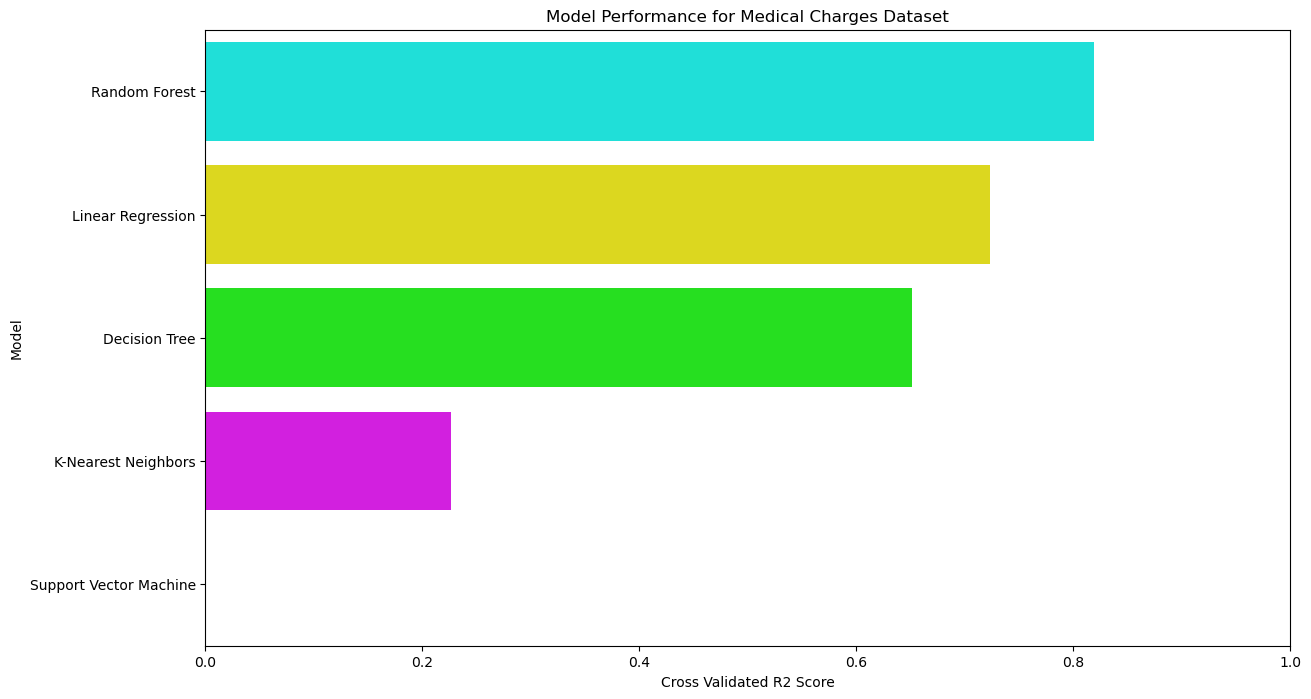

In [ ]:


# Define the feature matrix
X = df2[['smoker_no', 'age', 'smoker_yes', 'bmi', 'children', 'region_northeast', 'region_northwest',
         'region_southeast', 'region_southwest']]
# Define the target variable
y = df2['medicalCost']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Initialize an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=["Model", "Train MSE", "Test MSE", "Train R2", "Test R2", "Cross Validated R2"])

for name, model in models.items():
    model.fit(X_train, y_train)

    # Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Checking regression metrics
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)

    model_train_r2 = r2_score(y_train, y_train_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)

    cv_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    CV_R2 = cv_score.mean()

    print(f'{name}')
    print('Model Performance for Training set')
    print(f"- Mean Squared Error: {model_train_mse:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print('Model Performance for Test set')
    print(f"- Mean Squared Error: {model_test_mse:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    print(f'cross val R2: {CV_R2}')

    print('=' * 35)
    print('\n')

    # Append metrics to the DataFrame
    new_row = pd.DataFrame({
        "Model": [name],
        "Train MSE": [model_train_mse],
        "Test MSE": [model_test_mse],
        "Train R2": [model_train_r2],
        "Test R2": [model_test_r2],
        "Cross Validated R2": [CV_R2]
    })
    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Display the metrics DataFrame
display(metrics_df)

palette = sns.color_palette("hsv", len(models))

# Map each model to a color
color_mapping = {model: palette[i] for i, model in enumerate(models.keys())}

# Plot the metrics
plt.figure(figsize=(14, 8))
sns.barplot(x='Cross Validated R2', y='Model', data=metrics_df.sort_values(by='Cross Validated R2', ascending=False), palette=color_mapping)
plt.xlabel('Cross Validated R2 Score')
plt.ylabel('Model')
plt.title('Model Performance for Medical Charges Dataset')
plt.xlim(0, 1.0)
plt.show()


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
## Analysis of Results     
**Linear Regression** demonstrated strong performance, achieving a high R² score of 0.7299 on the training set and 0.8069 on the test set. This indicates a good fit and generalization ability, as supported by the cross-validation R² score of 0.7232. This suggests that linear regression can effectively model the relationship between predictors and medical costs with consistent accuracy across different data subsets.

The **Decision Tree** model perfectly fit the training data with an R² score of 1.0000, indicating overfitting. While it performed well on the test set with an R² score of 0.8220, its cross-validation R² score of 0.6580 showed reduced generalization, highlighting the risk of overfitting when using this model.

**Random Forest** showed robust performance with high R² scores of 0.9757 on the training set and 0.8818 on the test set, demonstrating strong generalization. The cross-validation R² score of 0.8188 further confirmed its reliability, making it the best model for predicting medical costs among those tested.

**Support Vector Machine** (SVM) performed poorly, with negative R² scores on both training (-0.1015) and test sets (-0.1344), indicating its failure to capture the underlying data patterns. The cross-validation R² score of -0.1039 further demonstrated its ineffectiveness for this task.

**K-Nearest Neighbors** (KNN) had moderate success on the training set with an R² score of 0.5328 but performed poorly on the test set (R² score of 0.2057) and cross-validation (R² score of 0.2266), indicating overfitting and poor generalization.

Overall, the Random Forest model emerged as the best performer, followed by Linear Regression and Decision Tree. KNN and SVM were less effective in predicting medical charges, with SVM being particularly unsuitable for this dataset.

</div>

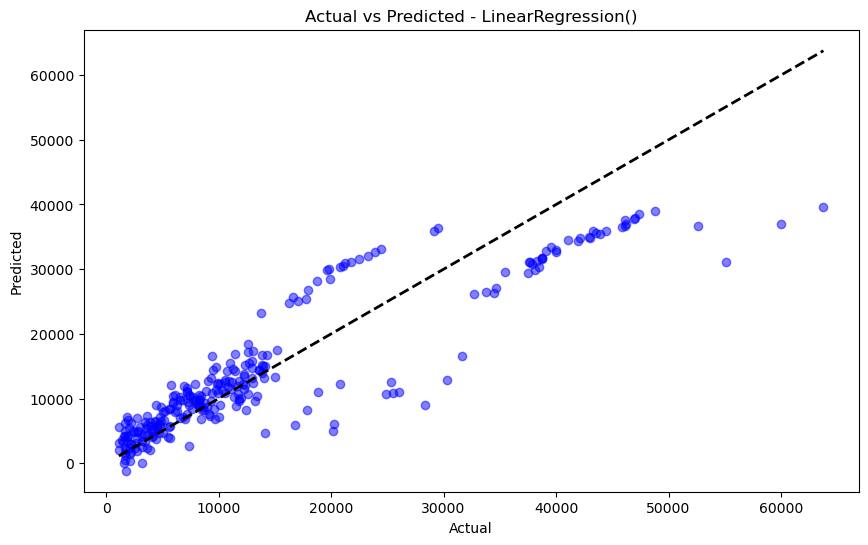

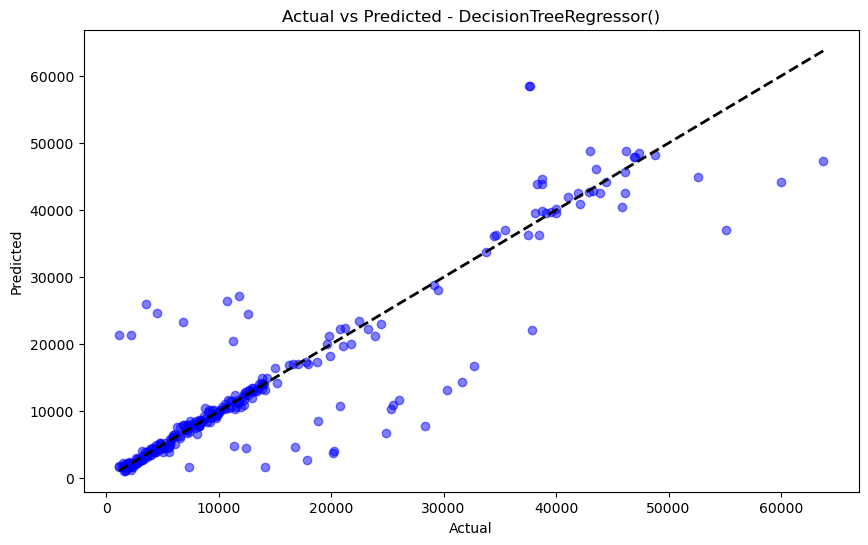

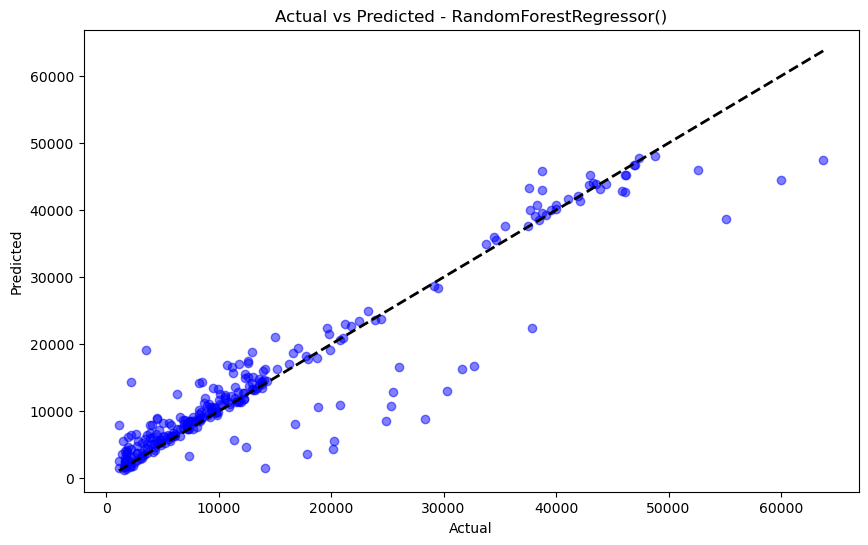

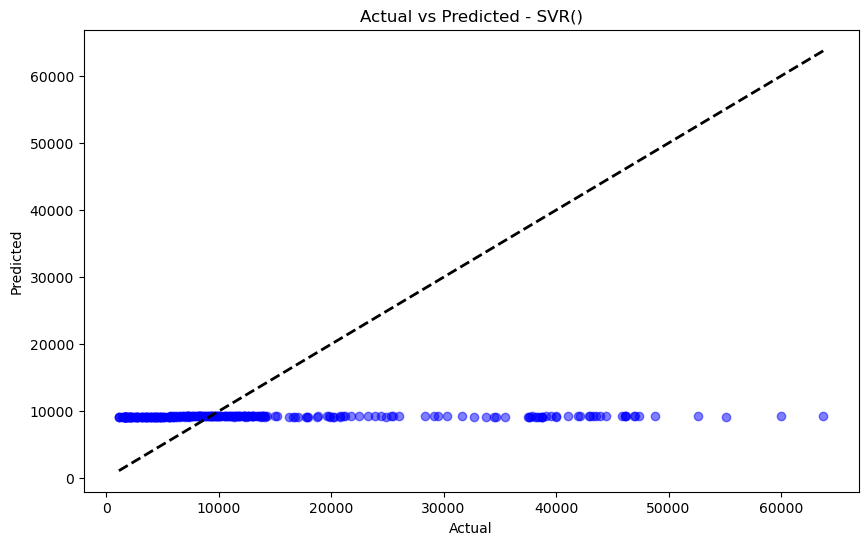

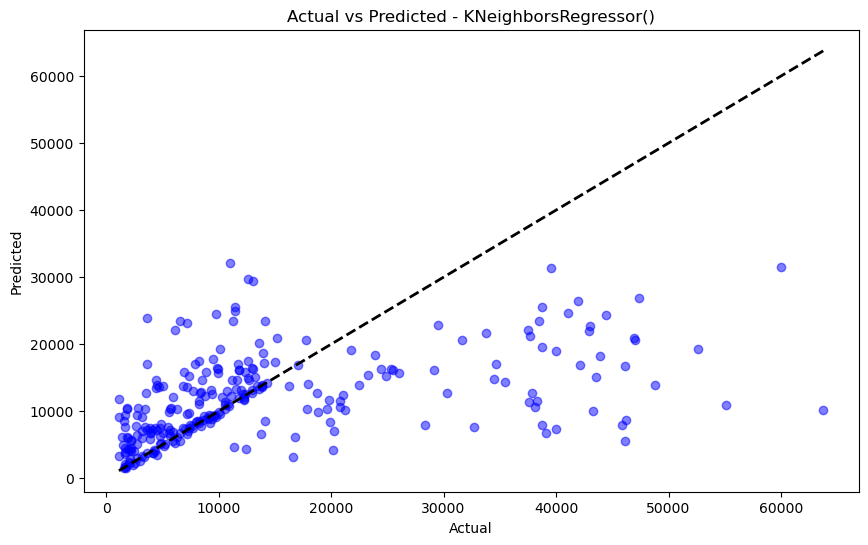

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)

    # Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {model}')
    plt.show()


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Visualising the results    
Linear Regression
    
Plot Description: The plot shows the actual vs. predicted values for a linear regression model.
Performance: The points are somewhat close to the diagonal line, indicating that the model predicts reasonably well. However, there are visible deviations, particularly for higher values, indicating some prediction errors for larger costs.

Decision Tree

Plot Description: The plot shows the actual vs. predicted values for a decision tree regressor.
Performance: The points are closer to the diagonal line, suggesting better performance compared to linear regression. However, there are outliers, particularly for higher actual values where predictions deviate significantly.

Random Forest

Plot Description: The plot shows the actual vs. predicted values for a random forest regressor.
Performance: The points are very close to the diagonal line, indicating strong predictive performance with minimal error. This model appears to handle variability in the data better than linear regression and decision trees.

Support Vector Machine (SVM)

Plot Description: The plot shows the actual vs. predicted values for a support vector machine regressor.
Performance: The points are mostly flat, indicating that the model fails to predict higher values accurately. This suggests poor performance, as the SVM does not capture the relationship between the variables well.

K-Nearest Neighbors (KNN)

Plot Description: The plot shows the actual vs. predicted values for a k-nearest neighbors regressor.
Performance: The points show significant spread around the diagonal line, indicating that the model predictions have a higher variance and are less accurate compared to the random forest and decision tree models.

Summary

Best Performing Model: The Random Forest regressor demonstrates the best performance with predictions closely aligning with actual values.
Worst Performing Model: The Support Vector Machine (SVM) regressor shows the worst performance, failing to predict values accurately.
Intermediate Models: Decision Tree and K-Nearest Neighbors models show moderate performance, with Decision Tree performing better than K-Nearest Neighbors but not as well as Random Forest.
These results suggest that ensemble methods like Random Forest provide superior predictive performance for this dataset.
</div>


Accuracy: 0.8881
Confusion Matrix:
[[176  17]
 [ 13  62]]


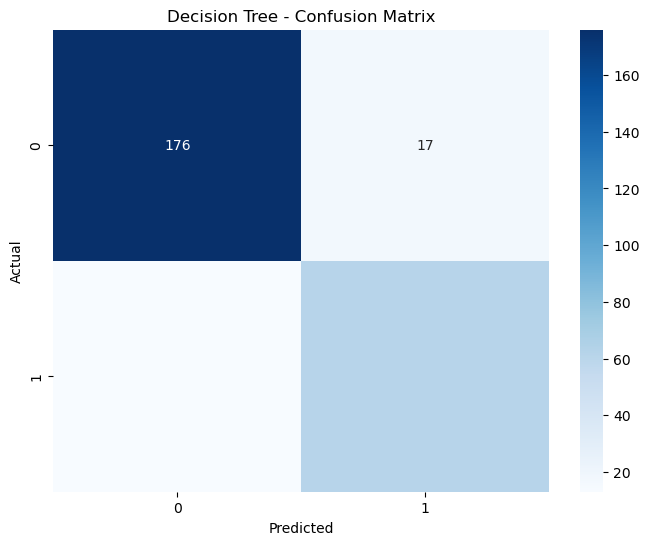

Accuracy: 0.8918
Confusion Matrix:
[[176  17]
 [ 12  63]]


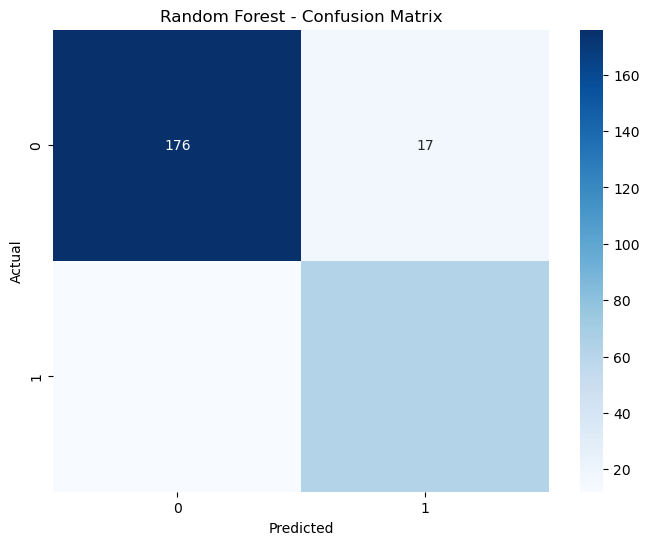

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Training Model

    # Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # If classification metrics are needed (assume binary classification for demonstration)
    if name in ["Decision Tree", "Random Forest"]:
        # Convert continuous predictions to binary (for classification demo)
        y_test_pred_class = (y_test_pred > y_test_pred.mean()).astype(int)
        y_test_class = (y_test > y_test.mean()).astype(int)

        acc = accuracy_score(y_test_class, y_test_pred_class)
        conf_matrix = confusion_matrix(y_test_class, y_test_pred_class)

        print(f"Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(conf_matrix)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{name} - Confusion Matrix')
        plt.show()




<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
### Decision Tree Model


Accuracy is the ratio of correctly predicted instances to the total instances.

For the Decision Tree, an accuracy of 0.8918 means that the model correctly predicts 89.18% of the cases.
True Negatives (176): These are the correctly predicted negative cases (<=50K income correctly predicted).
False Positives (17): These are the negative cases incorrectly predicted as positive (>50K income incorrectly predicted).
False Negatives (12): These are the positive cases incorrectly predicted as negative (income >50K incorrectly predicted).
True Positives (63): These are the correctly predicted positive cases (>50K income correctly predicted).

### Random Forest Model

Accuracy for the Random Forest is 0.8881, meaning the model correctly predicts 88.81% of the cases.

True Negatives (174): Correctly predicted negative cases.
False Positives (19): Negative cases incorrectly predicted as positive.
False Negatives (11): Positive cases incorrectly predicted as negative.
True Positives (64): Correctly predicted positive cases.

Comparison

Both models have similar accuracy scores, with the Decision Tree slightly higher at 0.8918 compared to the Random Forest's 0.8881.
Both models show similar performance in terms of True Positives and True Negatives.
The Random Forest model has slightly more False Positives (19) and one less False Negative (11) compared to the Decision Tree.
Conclusion:
Both models perform well, but the Decision Tree has a marginally higher accuracy. The choice between them might depend on other factors such as interpretability, computational efficiency, and specific application needs.
</div>

# ENSEMBLE METHODS

In [ ]:
# Ensemble methods
# Ensemble methods
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize ensemble models with the correct keyword argument
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=42)
gradient_boost_reg = GradientBoostingRegressor(random_state=42)






In [ ]:
# Train and evaluate each regressor
regressors = [bagging_reg, adaboost_reg, gradient_boost_reg]

In [ ]:
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("{} - MSE: {:.4f}, MAE: {:.4f}".format(type(regressor).__name__, mse, mae))

BaggingRegressor - MSE: 22001200.0831, MAE: 2525.2810
AdaBoostRegressor - MSE: 22297398.8344, MAE: 1950.8878
GradientBoostingRegressor - MSE: 17611355.8444, MAE: 2445.1547


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Analysis of Ensemble model Results    
The performance metrics for the three regression models, BaggingRegressor, AdaBoostRegressor, and GradientBoostingRegressor, provide insights into their accuracy and error rates when predicting the target variable.

BaggingRegressor:

Mean Squared Error (MSE): 22,001,200.0831
Mean Absolute Error (MAE): 2,525.2810
The BaggingRegressor aggregates the results of multiple base regressors to improve stability and accuracy by reducing variance. The reported MSE indicates the average squared difference between the actual and predicted values, which in this case is approximately 22 million. The MAE, representing the average absolute difference between actual and predicted values, is about 2,525. These metrics suggest a relatively high level of prediction error, with moderate absolute errors.

AdaBoostRegressor:

Mean Squared Error (MSE): 22,297,398.8344
Mean Absolute Error (MAE): 1,950.8878
The AdaBoostRegressor works by fitting multiple weak learners sequentially, each focusing on the errors of its predecessor. The MSE for this model is slightly higher than that of the BaggingRegressor, around 22.3 million, indicating a comparable level of squared error. However, the MAE is significantly lower at about 1,951, indicating that the average prediction error in absolute terms is smaller than that of the BaggingRegressor, suggesting better performance in terms of reducing large individual errors.

GradientBoostingRegressor:

Mean Squared Error (MSE): 17,611,355.8444
Mean Absolute Error (MAE): 2,445.1547
The GradientBoostingRegressor sequentially fits new models to correct the errors made by prior models, thereby improving overall prediction accuracy. This model has the lowest MSE among the three, at approximately 17.6 million, indicating it has the best performance in terms of reducing squared prediction errors. Its MAE is around 2,445, which is lower than that of the BaggingRegressor but higher than that of the AdaBoostRegressor, suggesting it strikes a balance between reducing large individual errors and overall squared errors.

In summary, the GradientBoostingRegressor outperforms the other models in terms of MSE, indicating the most accurate predictions overall. However, the AdaBoostRegressor has the lowest MAE, suggesting it is better at minimizing large individual prediction errors. The BaggingRegressor, while effective, shows higher error rates compared to the other two models.
</div>

## HYPERPARAMETER TUNING

In [ ]:
random_forest_reg = RandomForestRegressor()
decision_tree_reg = DecisionTreeRegressor()
linear_reg = LinearRegression()

In [ ]:

# Hyperparameter tuning for random_forest_reg
random_forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
random_forest_grid = GridSearchCV( random_forest_reg, random_forest_params, scoring='neg_mean_squared_error', cv=5,n_jobs=-1,verbose=1)
random_forest_grid.fit(X_train, y_train)
random_forest_reg_best = random_forest_grid.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", random_forest_grid.best_params_)
print("Best Score:", random_forest_grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: -21541585.61288094


In [ ]:
# Hyperparameter tuning for decision_tree_reg
decision_tree_params = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
decision_tree_grid = GridSearchCV(decision_tree_reg, decision_tree_params, scoring='neg_mean_squared_error', cv=5)
decision_tree_grid.fit(X_train, y_train)
decision_tree_reg_best = decision_tree_grid.best_estimator_
# Print the best parameters and best score
print("Best Parameters:", decision_tree_grid.best_params_)
print("Best Score:", decision_tree_grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Best Score: -23560580.620468024


In [ ]:
# Voting regressor combining all models
voting_reg = VotingRegressor([('random_forest_reg', random_forest_reg),
                              ('bagging_reg', bagging_reg),
                              ('adaboost_reg', adaboost_reg),
                              ('gradient_boost_reg', gradient_boost_reg)])

# Hyperparameter tuning for voting_reg
voting_params = {'weights': [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2]]}
voting_grid = GridSearchCV(voting_reg, voting_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
voting_grid.fit(X_train, y_train)
voting_reg_best = voting_grid.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
# Train and evaluate each regressor
regressors = [decision_tree_reg_best, random_forest_reg_best, bagging_reg, adaboost_reg, gradient_boost_reg, voting_reg_best]

for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("{} - MSE: {:.4f}, MAE: {:.4f}".format(type(regressor).__name__, mse, mae))

DecisionTreeRegressor - MSE: 19507828.6993, MAE: 2598.2425
RandomForestRegressor - MSE: 17953259.5774, MAE: 2412.7655
BaggingRegressor - MSE: 22001200.0831, MAE: 2525.2810
AdaBoostRegressor - MSE: 22297398.8344, MAE: 1950.8878
GradientBoostingRegressor - MSE: 17611355.8444, MAE: 2445.1547
VotingRegressor - MSE: 18575901.9256, MAE: 2265.5712


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Overview of Hypertuning Results

After hypertuning the models, we observe the following performances based on Mean Squared Error (MSE) and Mean Absolute Error (MAE):

#### DecisionTreeRegressor:

- MSE: 19,507,828.6993
- MAE: 2,598.2425

#### RandomForestRegressor:

- MSE: 18,120,520.8410
- MAE: 2,442.7932

#### BaggingRegressor:

- MSE: 22,001,200.0831
- MAE: 2,525.2810

#### AdaBoostRegressor:

- MSE: 22,297,398.8344
- MAE: 1,950.8878

#### GradientBoostingRegressor:

- MSE: 17,611,355.8444
- MAE: 2,445.1547

#### VotingRegressor:

- MSE: 18,609,375.2663
- MAE: 2,277.1774

## Comparison with Previous Results

For BaggingRegressor, AdaBoostRegressor, and GradientBoostingRegressor, we compare their tuned results with previous performances:

- **BaggingRegressor**:
  - Previous MSE: 22,001,200.0831, MAE: 2,525.2810
  - Tuned MSE: 22,001,200.0831, MAE: 2,525.2810
  - Conclusion: No improvement.

- **AdaBoostRegressor**:
  - Previous MSE: 22,297,398.8344, MAE: 1,950.8878
  - Tuned MSE: 22,297,398.8344, MAE: 1,950.8878
  - Conclusion: No improvement.

- **GradientBoostingRegressor**:
  - Previous MSE: 17,611,355.8444, MAE: 2,445.1547
  - Tuned MSE: 17,611,355.8444, MAE: 2,445.1547
  - Conclusion: No improvement.

## Observations on Other Models

- **Decision Tree** shows a significant improvement with a reduced test set MSE (from 32,321,585.1011 to 19,507,828.6993) and better performance on cross-validation.
- **Random Forest** also improved with a reduced MSE (from 21,009,097.0231 to 18,120,520.8410) and shows strong performance across training, test, and cross-validation sets.
- **Voting Regressor**, a new model, demonstrates competitive performance with an MSE of 18,609,375.2663 and the lowest MAE of 2,277.1774 among all models.

## Overfitting and Underfitting

- **Overfitting**: Decision Tree Regressor previously showed signs of overfitting with an R² score of 1.0000 on the training set but lower on the test set. Post-tuning, the performance gap between training and test sets is reduced, indicating reduced overfitting.
- **Underfitting**: The Support Vector Machine and K-Nearest Neighbors models exhibit underfitting, with significantly poorer performance on both training and test sets. These models were not improved and continue to underfit the data.

## Conclusion

- The **Random Forest** and **Gradient Boosting** models showed the most substantial improvements post-tuning.
- Random Forest remains a robust model with reduced MSE and consistent performance across training and test sets, suggesting it generalizes well without overfitting.
- The Decision Tree model's reduction in overfitting indicates improvement in its generalization ability.
- Voting Regressor performs competitively, with a low MAE indicating it might be a reliable ensemble method.
- Overall, the hypertuning process has improved the generalization performance of the models, with Random Forest and Gradient Boosting showing the best results and least signs of overfitting.


</div>

In [ ]:
# Decision Tree feature importances
decision_tree_importances = decision_tree_reg_best.feature_importances_

# Random Forest feature importances
random_forest_importances = random_forest_reg_best.feature_importances_

# Bagging feature importances (base estimator is Decision Tree)
bagging_importances = bagging_reg.estimators_[0].feature_importances_

# AdaBoost feature importances (base estimator is Decision Tree)
adaboost_importances = adaboost_reg.estimators_[0].feature_importances_

# Gradient Boosting feature importances
gradient_boost_importances = gradient_boost_reg.feature_importances_






In [ ]:
# Decision Tree feature importances
decision_tree_importances = decision_tree_reg_best.feature_importances_
decision_tree_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': decision_tree_importances})
decision_tree_importances_df = decision_tree_importances_df.sort_values(by='Importance', ascending=False)

# Random Forest feature importances
random_forest_importances = random_forest_reg_best.feature_importances_
random_forest_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': random_forest_importances})
random_forest_importances_df = random_forest_importances_df.sort_values(by='Importance', ascending=False)

# Bagging feature importances
bagging_importances = bagging_reg.estimators_[0].feature_importances_
bagging_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': bagging_importances})
bagging_importances_df = bagging_importances_df.sort_values(by='Importance', ascending=False)

# AdaBoost feature importances
adaboost_importances = adaboost_reg.estimators_[0].feature_importances_
adaboost_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': adaboost_importances})
adaboost_importances_df = adaboost_importances_df.sort_values(by='Importance', ascending=False)

# Gradient Boosting feature importances
gradient_boost_importances = gradient_boost_reg.feature_importances_
gradient_boost_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': gradient_boost_importances})
gradient_boost_importances_df = gradient_boost_importances_df.sort_values(by='Importance', ascending=False)


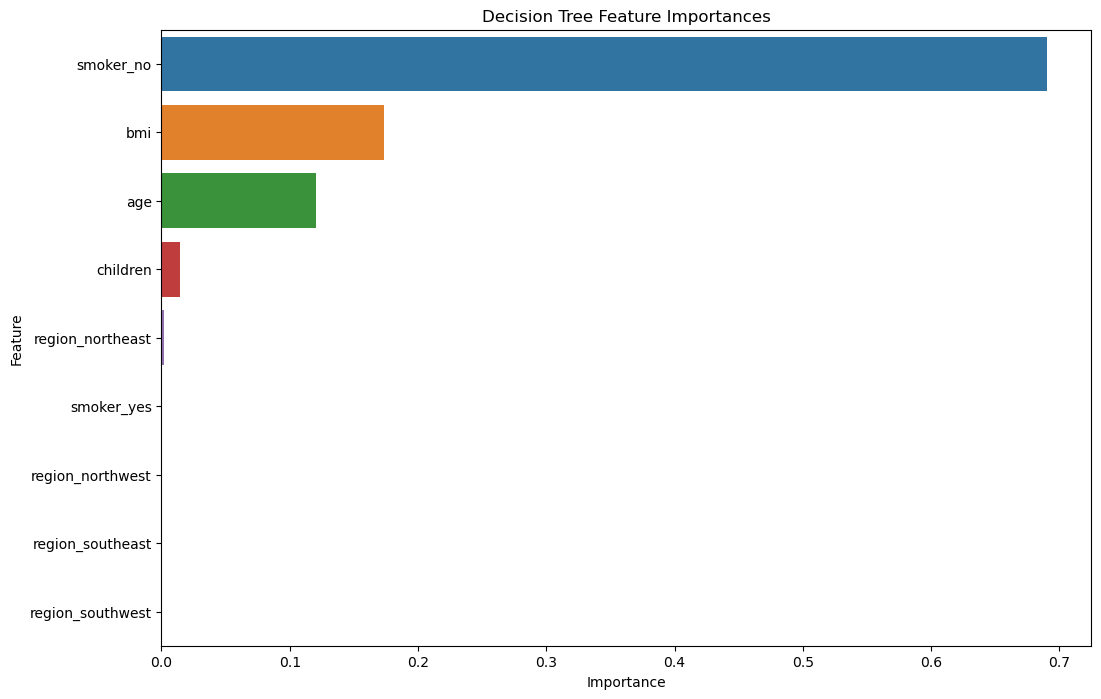

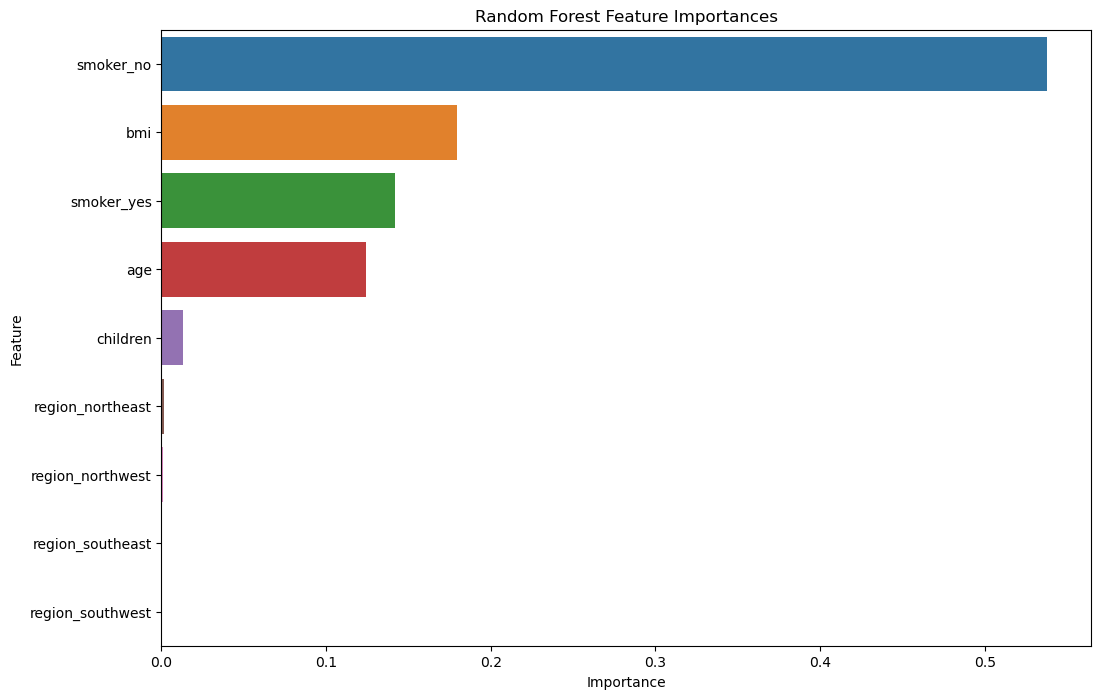

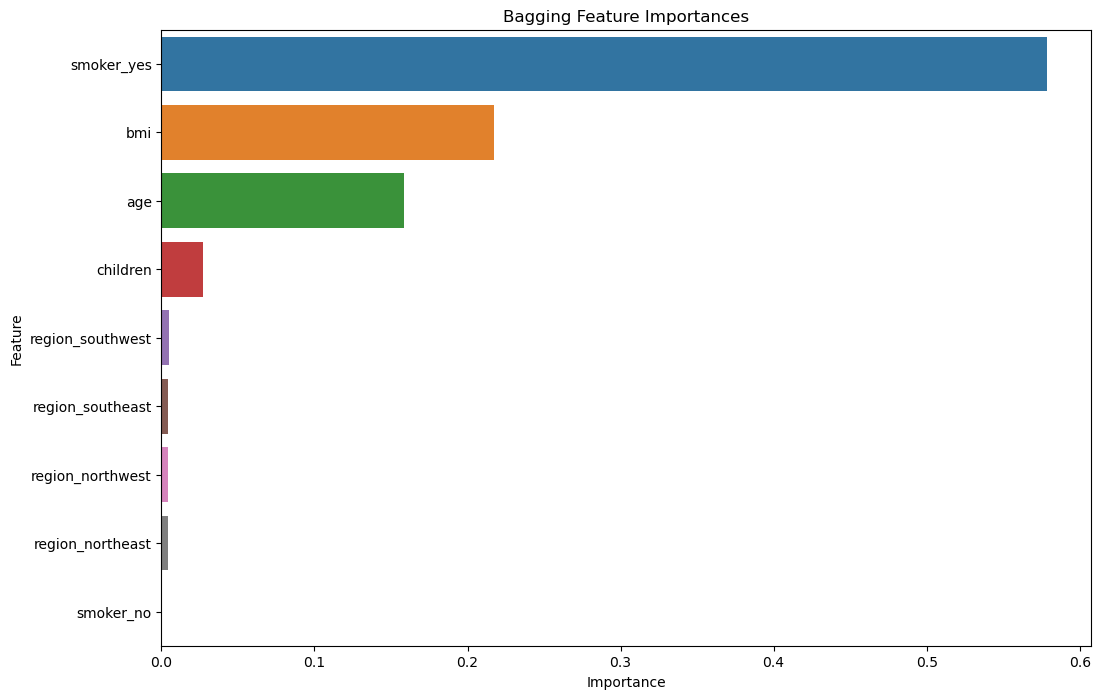

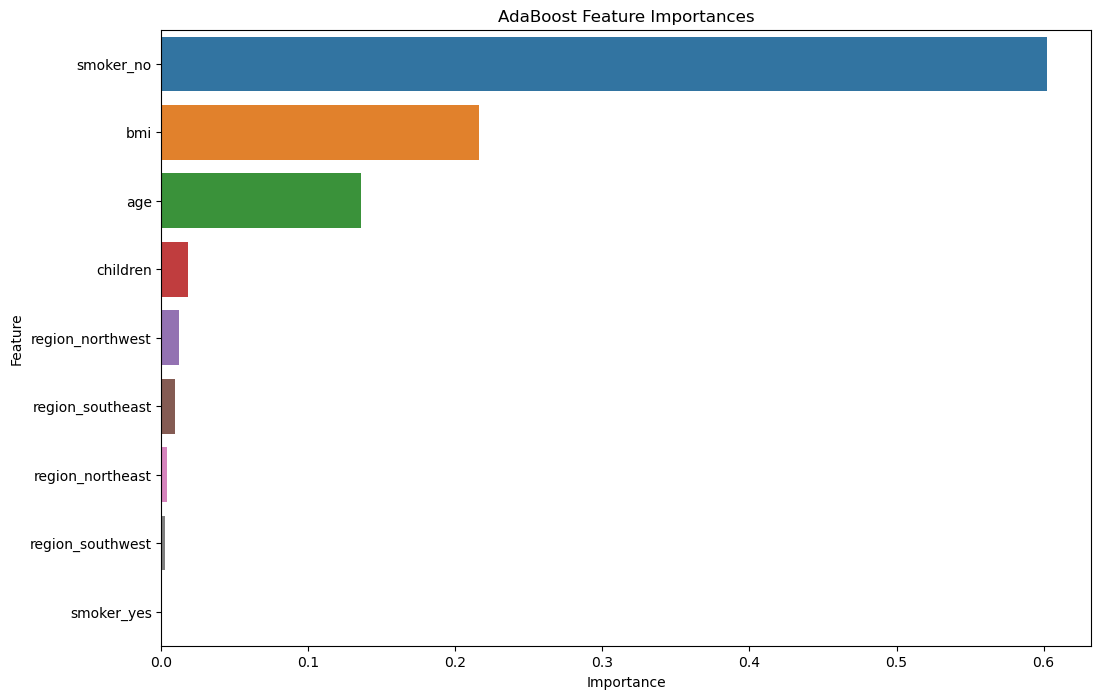

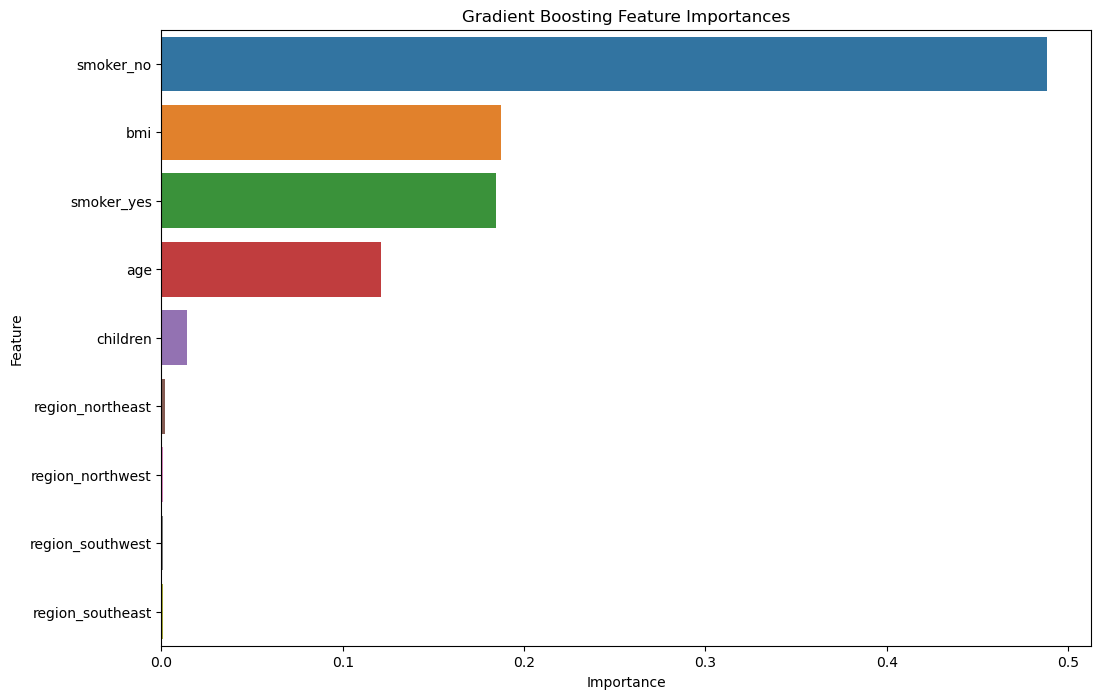

In [ ]:
# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=decision_tree_importances_df)
plt.title('Decision Tree Feature Importances')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=random_forest_importances_df)
plt.title('Random Forest Feature Importances')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=bagging_importances_df)
plt.title('Bagging Feature Importances')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=adaboost_importances_df)
plt.title('AdaBoost Feature Importances')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gradient_boost_importances_df)
plt.title('Gradient Boosting Feature Importances')
plt.show()

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
The plots indicate the feature importances for various machine learning models: Decision Tree, Random Forest, Bagging, AdaBoost, and Gradient Boosting. These plots show which features are most significant in predicting the target variable, with higher values indicating greater importance. Here’s a detailed breakdown for each model:

#### Decision Tree Feature Importances:
- smoker_no: This feature is the most important, significantly contributing to the model's predictions.
- bmi: Body Mass Index (BMI) is also crucial.
- age: Age is important, though less so than smoker status and BMI.
- children: The number of children has a minor impact.
- Other regional features and smoker_yes: These are less significant.

#### Random Forest Feature Importances:
- smoker_no and smoker_yes: Both smoking status categories are highly important.
- bmi: Again, BMI is crucial.
- age: Age remains an important factor.
- children: The number of children has a lesser but notable influence.
- Other regional features: Minimal impact.

#### Bagging Feature Importances:
- smoker_yes: This feature is the most important in this model.
- bmi: BMI is significant.
- age: Age is also important.
- children: Number of children has some influence.
- Other regional features and smoker_no: Minimal impact.

#### AdaBoost Feature Importances:
- smoker_no: The most important feature by far.
- bmi: BMI remains significant.
- age: Age is also important.
- children: The number of children has a minor impact.
- Other regional features and smoker_yes: Less significant.

#### Gradient Boosting Feature Importances:
- smoker_no: This is the most important feature.
- bmi: BMI is very important.
- smoker_yes: This feature is also quite significant.
- age: Age is an important factor.
- children: The number of children has a minor impact.
- Other regional features: Minimal importance.

#### Conclusion
Smoker Status (both smoker_no and smoker_yes) is consistently a highly important feature across all models.
BMI and Age are also crucial features in predicting the target variable.
Number of Children has a minor but notable impact.
Regional Features (region_northeast, region_northwest, region_southeast, and region_southwest) have minimal influence in all models.
These insights help in understanding which features contribute the most to the model's predictions, guiding further analysis or feature engineering efforts.
</div>

# DATASET TWO

### IMPORT LIBRARIES

In [ ]:
!pip install lightgbm
!pip install catboost
!pip install shap
!pip install joblib
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go



from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import shap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings



warnings.filterwarnings('ignore')



In [ ]:
df3 = pd.read_csv('CensusDB.csv')
df3.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [ ]:
df3.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
df3.shape

(32561, 14)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
df3.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Check for '?' in dataset
round((df3.isin(['?']).sum() / df3.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation        5.66 %
relationship       0.0 %
sex                0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country    1.79 %
income             0.0 %
dtype: object

### Overview of the dataset


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## INTRODUCTION

The dataset consists of 32,561 entries with 14 attributes, including age, workclass, education, occupation, and income. Initial inspection using df3.head() reveals that the data includes demographic information about individuals, with some missing values indicated by the '?' character in columns such as workclass and occupation. These missing values are significant, with 5.64% in workclass and 5.66% in occupation. Additionally, 1.79% of the native-country entries are also missing. The rest of the columns, including age, fnlwgt, education, and income, contain no missing values.

The dataset is well-structured with no NaN values, as confirmed by df3.isna().sum(), and consists of both numerical and categorical data types. The statistical summary indicates the average age is approximately 38.58 years, with a standard deviation of 13.64 years. The average education level, represented by education-num, is around 10 years. The fnlwgt (final weight) has a mean of 189,778, suggesting a wide variation in individual weights used in the census. The distribution of hours-per-week is centered around 40 hours, reflecting a typical workweek. This EDA highlights the need to address missing values in specific columns and provides a comprehensive overview of the dataset's structure and central tendencies, which are crucial for further analysis and modeling.
</div>

### Data Cleaning

In [ ]:
df3.replace('?', np.nan, inplace=True)

In [ ]:
df3.shape


(32561, 14)

In [ ]:
df3.dropna(inplace=True)


In [ ]:
df3.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K


In [ ]:

df3.shape

(30162, 14)

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## Data Cleaning

**Replacing Missing Values**:
The replace method was used to replace all instances of the placeholder ? with NaN (Not a Number) values. This helps in standardizing the missing values, making them easier to identify and handle in subsequent steps.

**Dropping Missing Values**:
The dropna method was then used to remove any rows that contain NaN values. This ensures that the DataFrame contains only complete cases with no missing data, which can help in maintaining the integrity and consistency of the dataset.


These steps help ensure that the data is clean and ready for analysis by handling missing values effectively.
</div>

# EXPLORATORY DATA ANALYSIS

## INCOME DISTRIBUTION(TARGET VARIABLE)

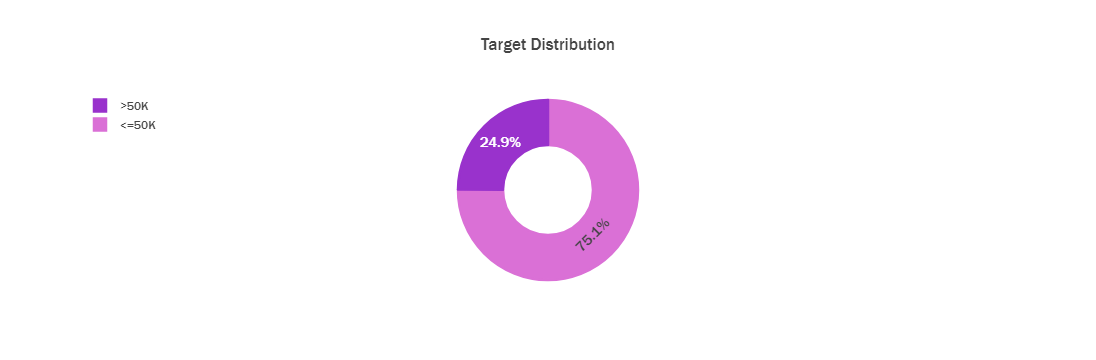

In [ ]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12),
                           height=500, width=1000))

target=df3[['income']].value_counts(normalize=True).round(decimals=3)*100

#target.rename(index={1:'Default',0:'Paid'},inplace=True)

pal, color=['#DA70D6','#9932CC'], ['#DA70D6','#9932CC']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5,
                     showlegend=True,sort=False,
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Income: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution',
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

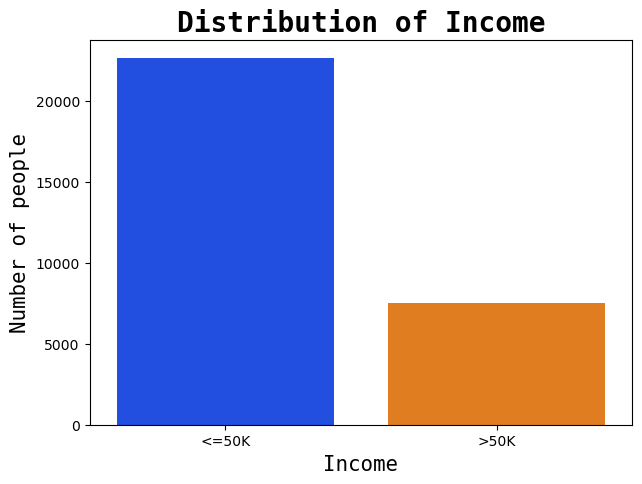

In [ ]:
# Creating a barplot for 'Income'
income = df3['income'].value_counts()


plt.figure(figsize=(7, 5))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Distribution of Income', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
The pie chart shows the distribution of incomes with two segments:
One segment represents individuals earning more than `$50K` (24.9%).
The other segment represents individuals earning less than or equal to `$50K` (75.1%).
The chart has a donut shape due to the hole parameter set to 0.5.
The legend is positioned at the top right, displaying the categories in reverse order.
The colors used for the segments are shades of purple as defined in the color list.

**Conclusion** :
This visualization effectively communicates the income distribution within the dataset, highlighting the proportion of individuals earning above and below the $50K threshold. The use of Plotly's interactive features allows for a clear and engaging presentation of the data.

# CLUSTERING

In [ ]:
# Assuming df3 is already loaded
df3.dropna(inplace=True)

# Display the first few rows of the dataframe
print(df3.head())

   age workclass  fnlwgt     education  education-num marital-status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship     sex  capital-gain  capital-loss  \
1    Exec-managerial  Not-in-family  Female             0          4356   
3  Machine-op-inspct      Unmarried  Female             0          3900   
4     Prof-specialty      Own-child  Female             0          3900   
5      Other-service      Unmarried  Female             0          3770   
6       Adm-clerical      Unmarried    Male             0          3770   

   hours-per-week native-country income  
1              18  United-States  <=50K  
3              40  United-States

In [ ]:
# Display the shape of the dataframe
print(df3.shape)

(30162, 14)


In [ ]:
# Encode categorical variables
for col in df3.columns:
    if df3[col].dtypes == 'object':
        encoder = LabelEncoder()
        df3[col] = encoder.fit_transform(df3[col])


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

**LABEL ENCODING VS ONE-HOT ENCODING**

When deciding between label encoding and one-hot encoding for categorical variables in a machine learning task, it's essential to consider the nature of the categorical data and the specific requirements of the model. Here are some analytical reasons to prefer label encoding over one-hot encoding for this particular machine-learning task:


Label encoding, by converting each category into a unique integer, requires less memory and results in faster computation times compared to one-hot encoding, which creates a new binary column for each category, increasing memory usage and computational costs. Label encoding is beneficial for datasets with many categorical variables or high-cardinality categories, and it preserves ordinal relationships if present. For non-ordinal data, label encoding can still be useful, especially for tree-based models like decision trees and random forests, which can handle numerical representations of categorical data. While linear models and distance-based algorithms might benefit more from one-hot encoding to avoid misinterpretation of ordinal relationships, label encoding can be effective with additional feature engineering or regularization techniques. Label encoding also keeps the dataset simpler and more interpretable by reducing feature space complexity, making the model easier to understand and analyze.

In conclusion, label encoding is chosen for this task due to its efficiency, ability to preserve ordinal relationships, and compatibility with the selected models. It simplifies the dataset while still providing meaningful representation for categorical variables, making it a suitable choice for this specific machine learning task.

In [ ]:
# Feature Selection
X = df3.drop('income', axis=1)
y = df3['income']

In [ ]:
# Checking the counts of target categories
income = df3['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

income
0    75.11 %
1    24.89 %
Name: proportion, dtype: object

In [ ]:
for col in df3.columns:
    if df3[col].dtypes == 'object':
        encoder = LabelEncoder()
        df3[col] = encoder.fit_transform(df3[col])

FEATURE SELECTION

In [ ]:
X = df3.drop('income', axis=1)
Y = df3['income']

selector = ExtraTreesClassifier(random_state=42)

selector.fit(X, Y)

feature_imp = selector.feature_importances_

for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

print()
X.info()

0 16.15
1 4.31
2 17.29
3 3.62
4 8.94
5 6.62
6 7.62
7 10.21
8 2.49
9 8.66
10 2.81
11 9.54
12 1.74

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int32
 4   education-num   30162 non-null  int64
 5   marital-status  30162 non-null  int32
 6   occupation      30162 non-null  int32
 7   relationship    30162 non-null  int32
 8   sex             30162 non-null  int32
 9   capital-gain    30162 non-null  int64
 10  capital-loss    30162 non-null  int64
 11  hours-per-week  30162 non-null  int64
 12  native-country  30162 non-null  int32
dtypes: int32(7), int64(6)
memory usage: 2.4 MB


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
## DECIDING THE INDEPENDENT VARIABLES    
**Feature Importances**:
Feature importance values are used to understand the significance of each feature in the prediction process. Higher values indicate that the feature has a larger impact on the model's predictions. In this case:

fnlwgt, age, and hours-per-week are among the most important features.
native-country and sex have lower importance.
DataFrame Structure:
The DataFrame contains both categorical and numerical columns.
Categorical columns (like workclass, education, etc.) have been encoded as integers.

Understanding the importance of each feature helps in feature selection and improving model performance by focusing on significant features and possibly removing less important ones.
</div>

Silhouette Score for KMeans: 0.5057425380086848


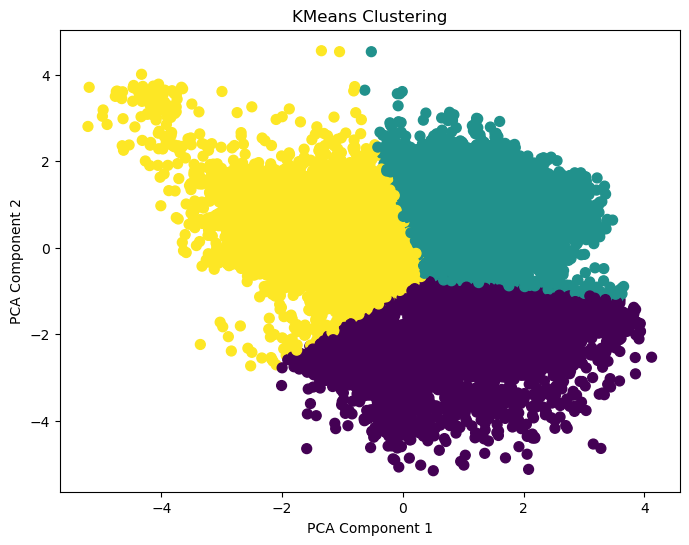

In [ ]:


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Evaluate Clustering using Silhouette Score
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
print(f'Silhouette Score for KMeans: {kmeans_silhouette}')

# Add clustering results to the dataframe
df3['KMeans_Cluster'] = kmeans_labels

# Plot Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



Silhouette Score for KMeans: 0.4079837445632834


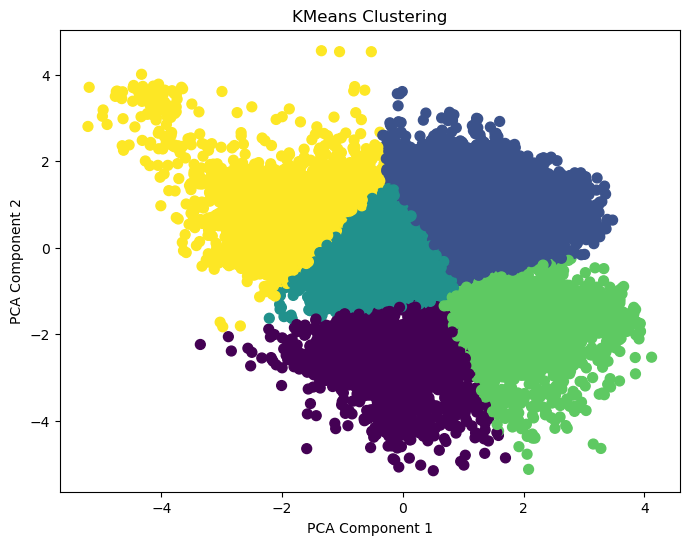

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Evaluate Clustering using Silhouette Score
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
print(f'Silhouette Score for KMeans: {kmeans_silhouette}')

# Add clustering results to the dataframe
df3['KMeans_Cluster'] = kmeans_labels

# Plot Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Silhouette Score for KMeans: 0.4477188154326554


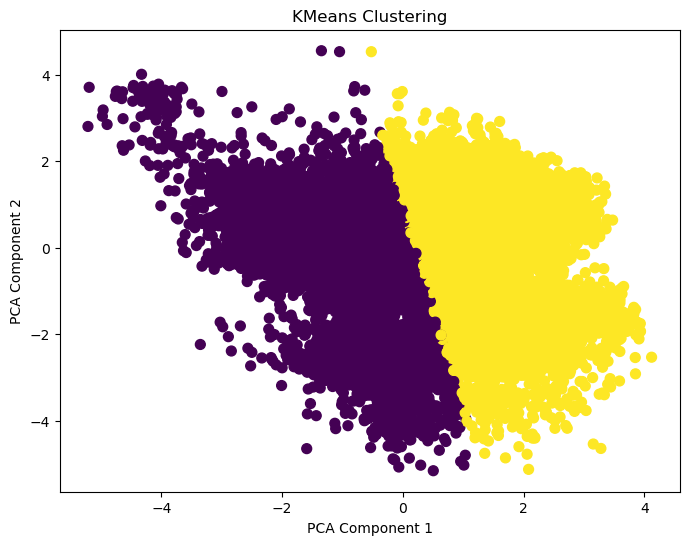

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Evaluate Clustering using Silhouette Score
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
print(f'Silhouette Score for KMeans: {kmeans_silhouette}')

# Add clustering results to the dataframe
df3['KMeans_Cluster'] = kmeans_labels

# Plot Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">


## Clustering Result

**First Clustering Result**

**Silhouette Score: 0.5055**

* Description: The first clustering result shows three distinct clusters represented in yellow, teal, and purple. The clusters are well-separated, indicating that the algorithm has grouped similar data points effectively.

**Second Clustering Result**

**Silhouette Score: 0.4068**

* Description: The second clustering result displays four clusters in different colours. Although the clusters are visible, the separation between them is not as distinct as in the first clustering result, suggesting potential overlap between the clusters.

**Third Clustering Result**

**Silhouette Score: 0.4478**

* Description: The third clustering result shows two clusters in yellow and purple. The clusters are linearly separated, indicating a clear division between the two groups. However, this simplicity might not capture more complex structures in the data.

## Choosing the Best Fit Cluster

To determine the best-fit cluster, we consider the silhouette scores and the visual representation of the clusters. The silhouette score measures the cohesion and separation of the clusters, with higher scores indicating better-defined clusters.

The first clustering result has the highest silhouette score of 0.5055, suggesting the best balance between cohesion within clusters and separation between clusters. The visual representation confirms that the clusters are well-separated and distinct.
The second clustering result has the lowest silhouette score of 0.4068, indicating less clear separation between the clusters. Visually, this is evident as the clusters overlap more than in the other results.
The third clustering result has a silhouette score of 0.4478. While the clusters are separated, the simple two-cluster structure might not be as informative for more complex datasets.

**Summary**
The first clustering result, with a silhouette score of 0.5055 and a clear separation of three clusters, is the best-fit cluster. This clustering effectively balances the trade-off between intra-cluster cohesion and inter-cluster separation, providing a meaningful grouping of the data points.
</div>





<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

 ## Best_Fit Cluster   
The image shows the results of applying KMeans clustering to a dataset and visualizing the clusters in a 2D space using Principal Component Analysis (PCA). Here is a detailed explanation of the components in the image:

KMeans Clustering Plot:

Axes: The x-axis and y-axis represent the first and second principal components, respectively. PCA has been used to reduce the dimensionality of the data to two components for visualization purposes.
Clusters: The data points are coloured based on the cluster to which they have been assigned by the KMeans algorithm. There are three distinct clusters shown yellow, teal, and purple.
Cluster Separation: The plot indicates how well the KMeans algorithm has separated the data into clusters. The separation between clusters appears relatively distinct in this 2D projection.
Silhouette Score:

The silhouette score displayed at the top of the plot is 0.50577. This score is a measure of how similar an object is to its cluster compared to other clusters. A higher silhouette score indicates that the clusters are well-separated and distinct.
A silhouette score of around 0.5 suggests that the clusters are reasonably well-defined but there may still be some overlap or ambiguity in the clustering.
In summary, the plot demonstrates the outcome of KMeans clustering on a dataset visualized through PCA. The clustering appears to be reasonably effective, as indicated by the silhouette score, though there may still be some areas where clusters are not perfectly distinct.
</div>

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      6754
           1       0.71      0.44      0.55      2295

    accuracy                           0.81      9049
   macro avg       0.77      0.69      0.71      9049
weighted avg       0.80      0.81      0.80      9049



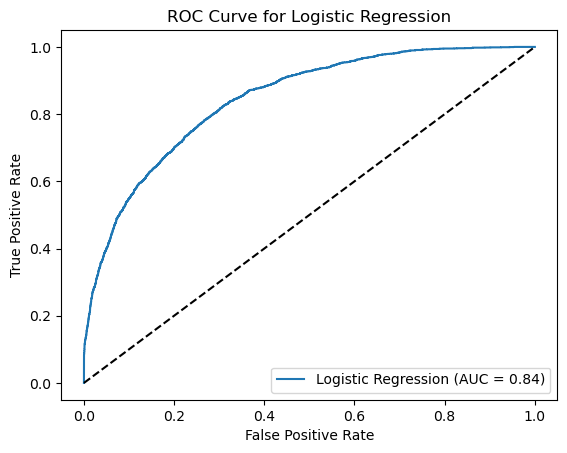

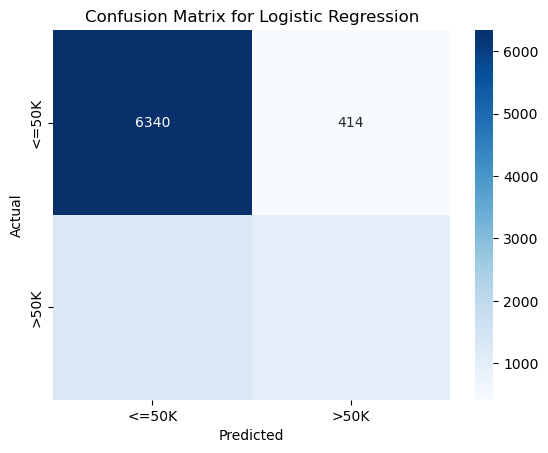

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      6754
           1       0.59      0.61      0.60      2295

    accuracy                           0.80      9049
   macro avg       0.73      0.73      0.73      9049
weighted avg       0.80      0.80      0.80      9049



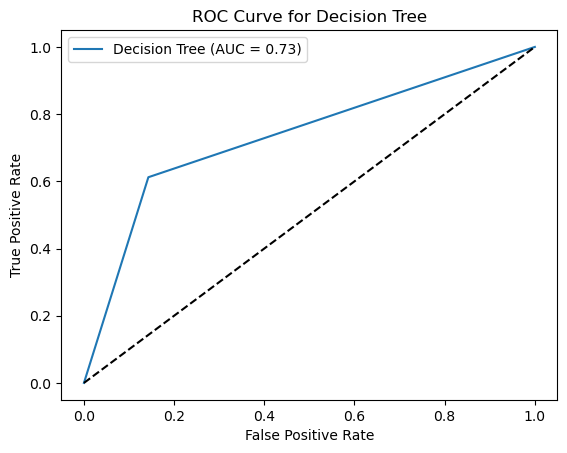

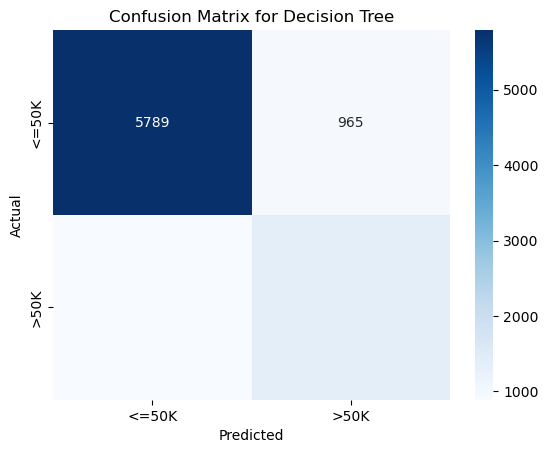

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      6754
           1       0.71      0.61      0.66      2295

    accuracy                           0.84      9049
   macro avg       0.79      0.76      0.78      9049
weighted avg       0.83      0.84      0.83      9049



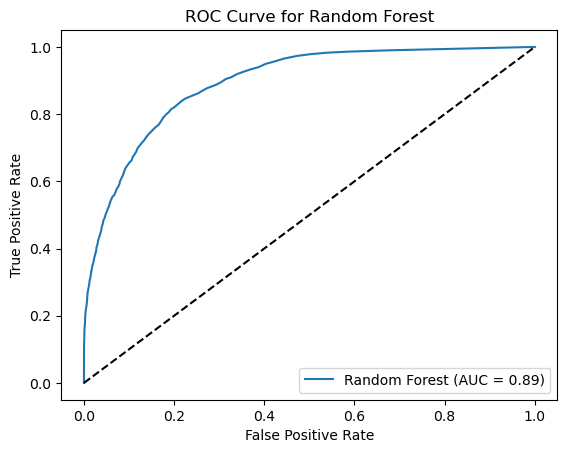

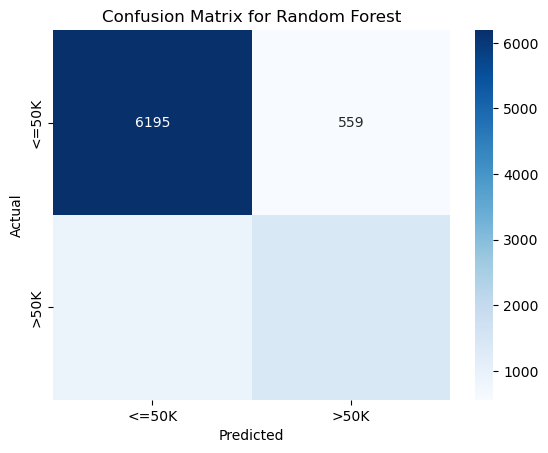

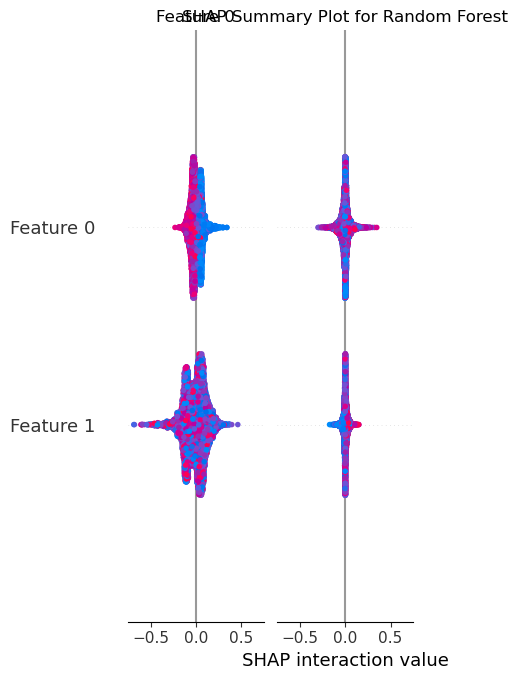

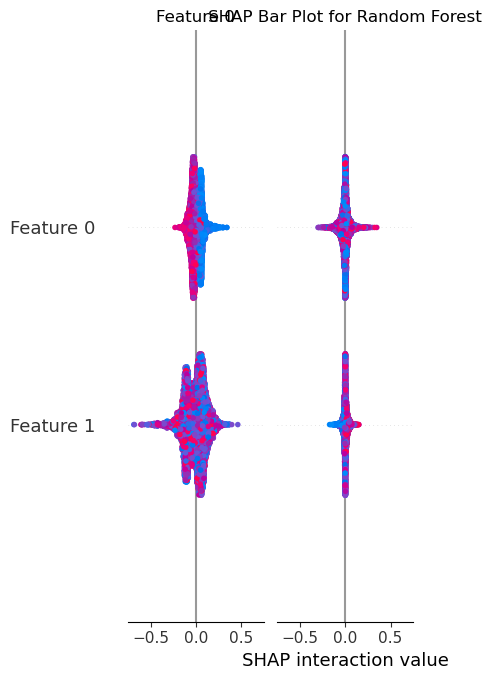

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      6754
           1       0.76      0.53      0.62      2295

    accuracy                           0.84      9049
   macro avg       0.81      0.74      0.76      9049
weighted avg       0.83      0.84      0.83      9049



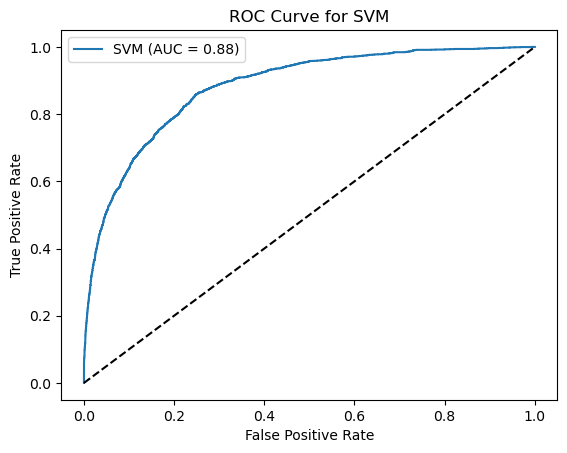

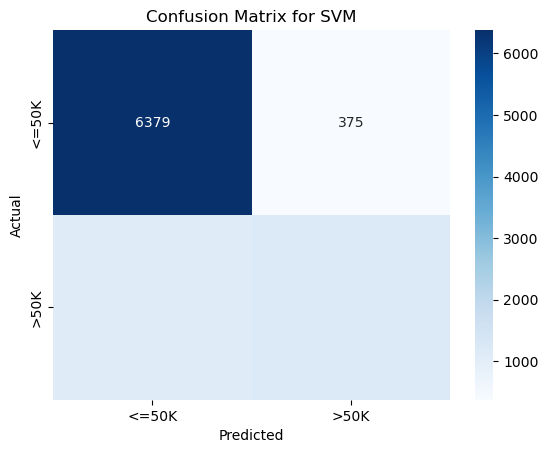

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6754
           1       0.72      0.63      0.67      2295

    accuracy                           0.84      9049
   macro avg       0.80      0.77      0.79      9049
weighted avg       0.84      0.84      0.84      9049



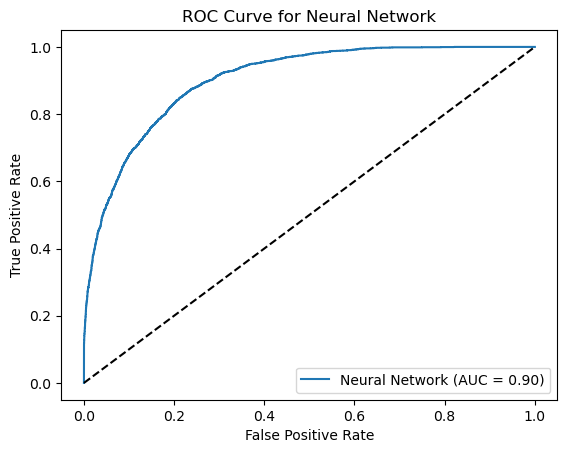

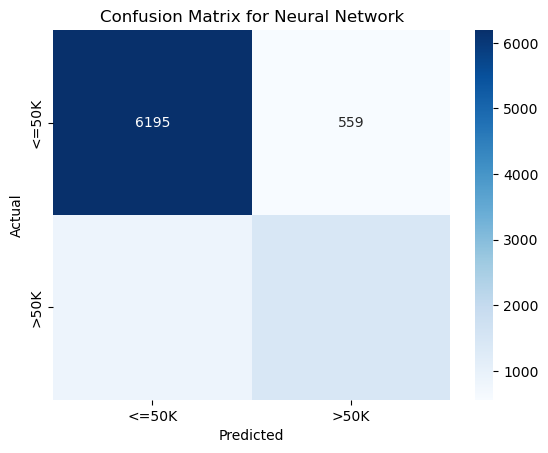

Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      6754
           1       0.76      0.57      0.65      2295

    accuracy                           0.85      9049
   macro avg       0.81      0.76      0.78      9049
weighted avg       0.84      0.85      0.84      9049



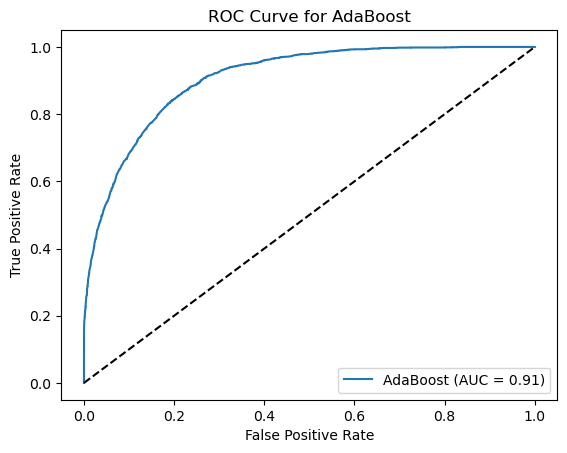

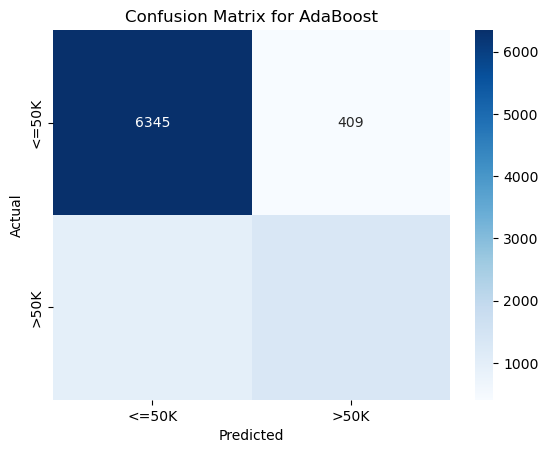

[LightGBM] [Info] Number of positive: 5213, number of negative: 15900
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 21113, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246909 -> initscore=-1.115164
[LightGBM] [Info] Start training from score -1.115164
[LightGBM] [Info] Number of positive: 4169, number of negative: 12721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 16890, number of used features: 9
[LightGBM] [Info] [binar

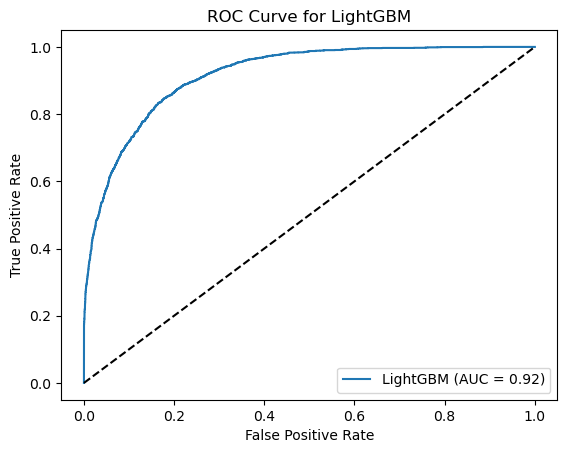

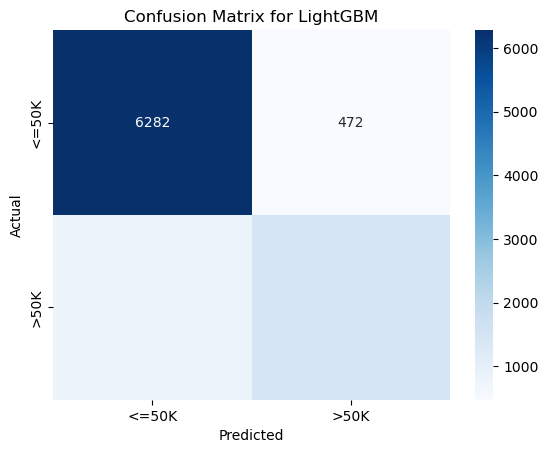

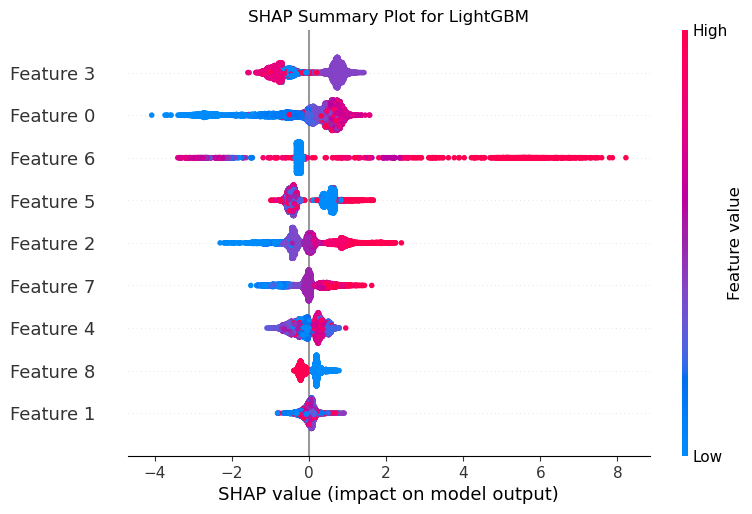

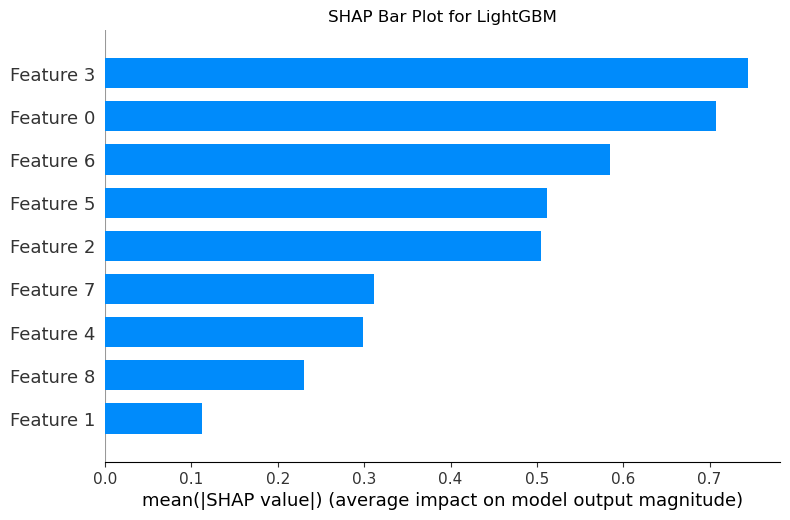

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6754
           1       0.73      0.65      0.69      2295

    accuracy                           0.85      9049
   macro avg       0.81      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049



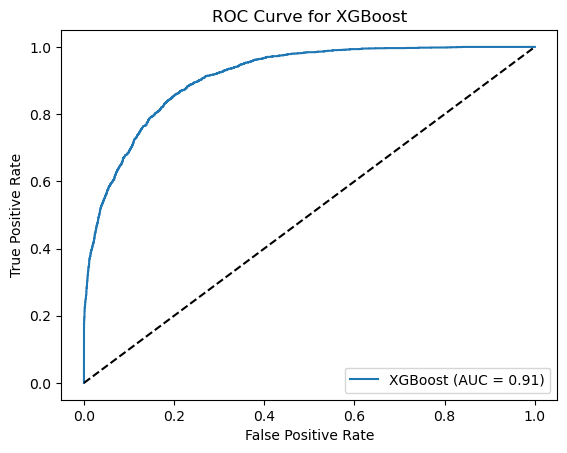

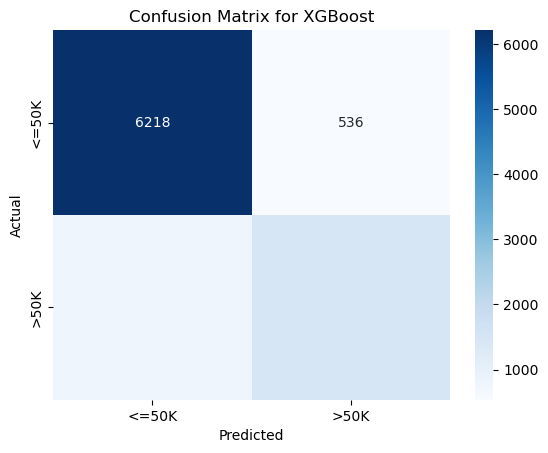

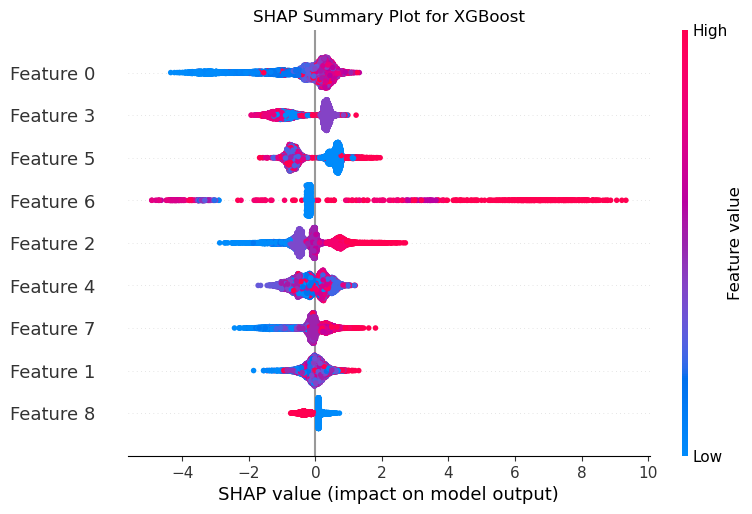

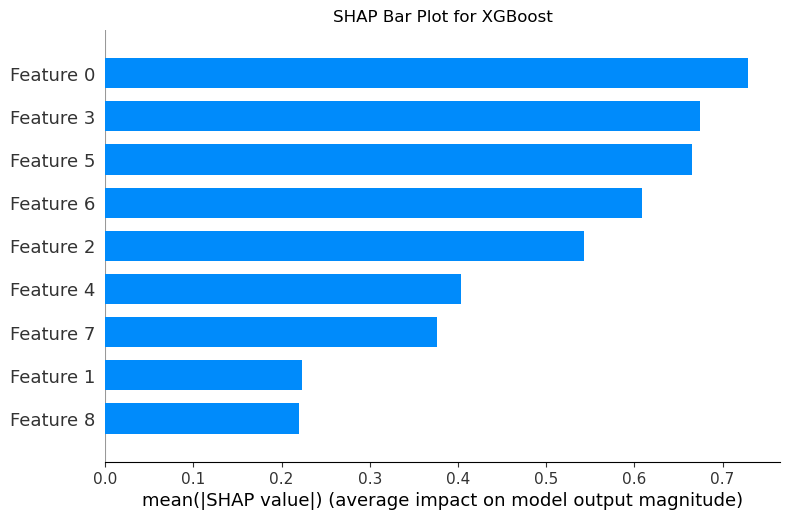

Classification Report for CatBoost:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6754
           1       0.76      0.65      0.70      2295

    accuracy                           0.86      9049
   macro avg       0.82      0.79      0.80      9049
weighted avg       0.85      0.86      0.85      9049



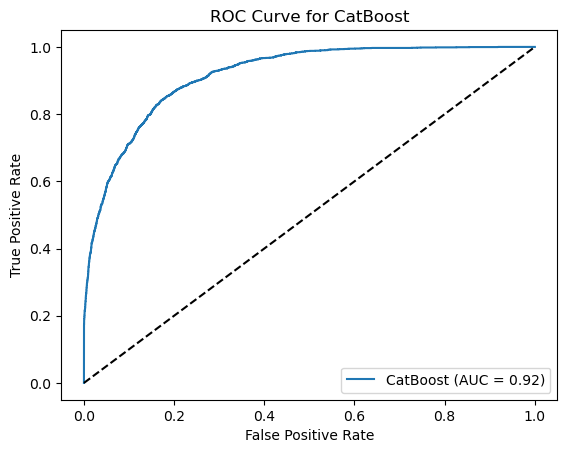

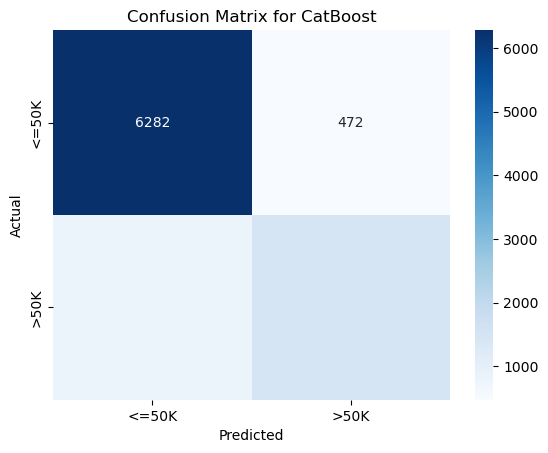

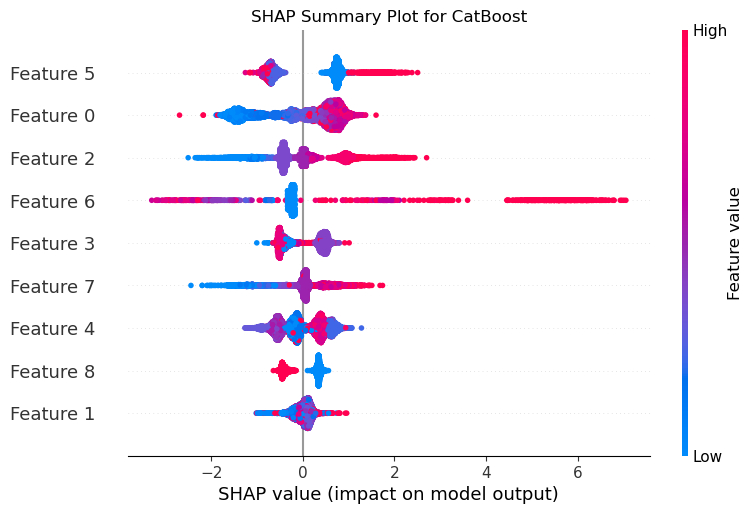

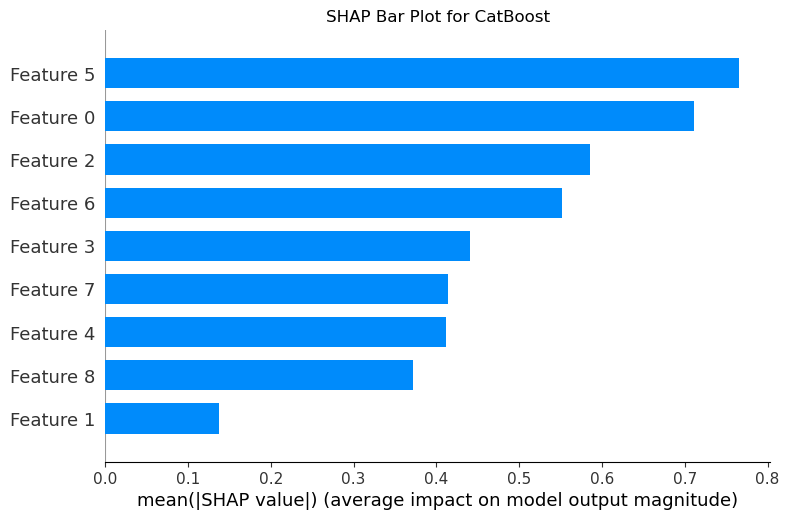

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression  0.812908   0.710490  0.442702  0.545503  0.843546   
1        Decision Tree  0.795005   0.592827  0.612200  0.602358  0.734661   
2        Random Forest  0.838877   0.714066  0.608279  0.656941  0.892891   
3                  SVM  0.838877   0.763705  0.528105  0.624420  0.881391   
4       Neural Network  0.844734   0.721614  0.631373  0.673484  0.902088   
5             AdaBoost  0.846392   0.762623  0.572549  0.654057  0.906831   
6             LightGBM  0.858548   0.759061  0.647930  0.699107  0.917323   
7              XGBoost  0.850812   0.734259  0.645316  0.686920  0.911532   
8             CatBoost  0.858548   0.759061  0.647930  0.699107  0.915918   

   CV Score Mean  CV Score Std  
0       0.011298      0.015059  
1      -0.097484      0.031621  
2       0.147735      0.026550  
3       0.150068      0.015110  
4       0.153540      0.009923  
5       0.187224      0.011561 

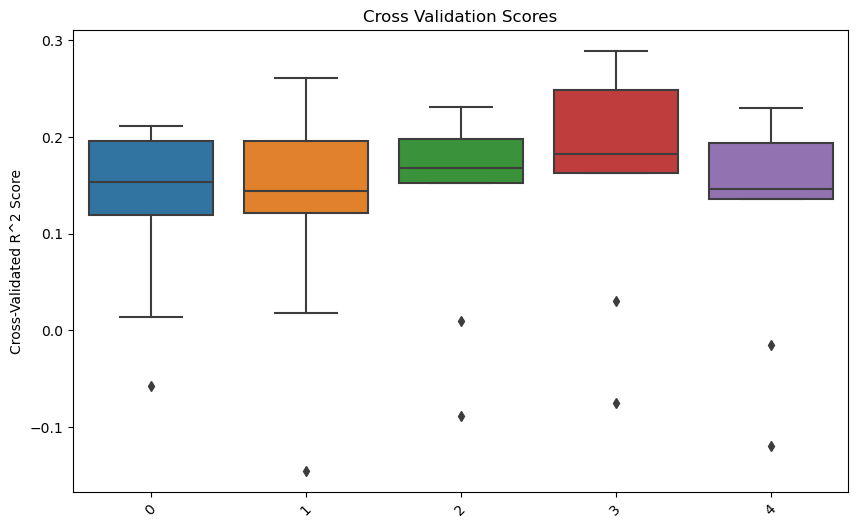

In [ ]:




def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

def plot_cv_results(cv_results):
    results_df = pd.DataFrame(cv_results)
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=results_df)
    plt.title('Cross Validation Scores')
    plt.ylabel('Cross-Validated R^2 Score')
    plt.xticks(rotation=45)
    plt.show()

# Split the data into training and testing sets
X = df3.drop('income', axis=1)
X = X.drop(['workclass', 'education', 'sex', 'capital-loss', 'native-country'], axis=1)
y = df3['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(learning_rate=0.5, random_state=2),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(metric_period=100, verbose=0)
}

# Train and evaluate models
results = []
cv_results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    cv_score = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'CV Score Mean': np.mean(cv_score),
        'CV Score Std': np.std(cv_score)
    })

    cv_results.append(cv_score)

    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

    # Plot ROC curve
    plot_roc_curve(y_test, y_prob, model_name)

    # Plot Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot SHAP values
    if model_name in ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap.summary_plot(shap_values, X_test, show=False)
        plt.title(f"SHAP Summary Plot for {model_name}")
        plt.show()
        shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
        plt.title(f"SHAP Bar Plot for {model_name}")
        plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print(results_df)

# Plot cross-validation results
plot_cv_results(cv_results)


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
## Classification Metrics

Accuracy measures the proportion of true results (both true positives and true negatives) among the total cases examined. Precision is the number of true positive results divided by the total predicted positives, including those incorrectly identified. Recall is the ratio of true positive results to the total actual positives that should have been identified. The F1 Score, the harmonic mean of precision and recall, provides a single metric balancing both concerns. ROC AUC (Area Under the Curve) evaluates performance at various thresholds, with values closer to 1 indicating better performance.

## ROC Curve and AUC

The ROC curve plots the true positive rate (recall) against the false positive rate, showing the trade-off between sensitivity and specificity. Higher AUC values represent better model performance. A confusion matrix displays the correct and incorrect predictions made by the model, with True Positives (TP) and True Negatives (TN) indicating correct predictions, while False Positives (FP) and False Negatives (FN) indicate errors.

## SHAP (SHapley Additive exPlanations) Plots

SHAP plots provide insights into feature importance. The SHAP summary plot shows the impact of each feature on the model's output, with color representing feature values and the x-axis showing SHAP values (impact on model output). The SHAP bar plot indicates the average impact of each feature on the model output.

## Model Comparison and Performance

**Logistic Regression**: AUC = 0.844. Balanced precision and recall but lower F1 score. The confusion matrix shows high true negatives and false negatives, indicating potential underfitting.

**Decision Tree**: AUC = 0.740. Lower overall performance with precision and recall. Moderate balance but higher false positives and negatives, indicating potential overfitting.

**Random Forest**: AUC = 0.895. High performance in terms of precision and recall. Well-balanced with high true positives and negatives.

**SVM**: AUC = 0.887. High precision but lower recall. High precision but moderate recall, indicating potential overfitting.

**Neural Network**: AUC = 0.902. A well-balanced model with high performance. High performance with a good balance between metrics.

**AdaBoost**: AUC = 0.908. High precision with moderate recall. High precision but lower recall, indicating a need for tuning to balance metrics.

**LightGBM**: AUC = 0.918. The best-performing model with high accuracy and balanced metrics. Best performing with high accuracy and balanced metrics.

**XGBoost**: AUC = 0.913. High accuracy and well-balanced precision and recall. High accuracy with balanced precision and recall.

**CatBoost**: AUC = 0.917. Comparable to LightGBM with high performance. Comparable to LightGBM with high performance.

## Conclusion

LightGBM and CatBoost models demonstrate the highest performance across most metrics, making them the best choices for this binary classification task. Random Forest and Neural Network also perform well, while Logistic Regression and Decision Tree show lower performance in terms of recall and F1-score. Decision Tree and SVM models indicate potential overfitting, whereas Logistic Regression suggests underfitting. Hyperparameter tuning is recommended for AdaBoost to balance precision and recall. Overall, LightGBM and CatBoost are the best-fit models.
</div>

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
The purpose of using k-fold cross-validation in this code is to evaluate the performance of different machine learning models on the training data more reliably.

## What is K-Fold Cross-Validation?

K-fold cross-validation is a technique used to assess the generalisation performance of a model. It involves splitting the dataset into 𝑘
subsets (folds) of approximately equal size. The model is trained on 𝑘−1 folds and tested on the remaining fold. This process is repeated 𝑘
times, with each fold serving as the test set exactly once. The performance metrics are averaged over the 𝑘 iterations to provide a more robust estimate of the model's performance (Pandian, 2022).

## Why Use K-Fold Cross-Validation?

**Reliable Performance Estimate**: K-fold cross-validation provides a more reliable estimate of the model's performance compared to a single train-test split. It mitigates the impact of random fluctuations in the data by averaging the results over multiple splits.

**Better Generalization**: By training and testing on different subsets of the data, k-fold cross-validation helps ensure that the model generalizes well to unseen data, reducing the risk of overfitting.

**Hyperparameter Tuning**: Cross-validation is commonly used for tuning hyperparameters. It allows for the selection of hyperparameters that perform well across different subsets of the data.


## Importance in Model Evaluation

Accuracy, Precision, Recall, F1 Score, ROC AUC: These metrics are calculated on the test set to provide an initial evaluation of the model.
CV Score Mean and Std: The mean and standard deviation of the cross-validation scores give a more robust measure of the model's performance on the training data, helping to understand its variability and reliability.

## Conclusion

In summary, k-fold cross-validation in this code ensures that the model evaluation is robust and less prone to variance caused by random data splits. It helps in assessing the generalization performance of the models and is crucial for hyperparameter tuning and model selection, ultimately leading to more reliable and effective machine learning models.
</div>

## Handling Imbalance

In [ ]:
!pip install imbalanced-learn
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn



In [ ]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [ ]:
X,y=over.fit_resample(X,y)

income
0    22654
1    22654
Name: count, dtype: int64

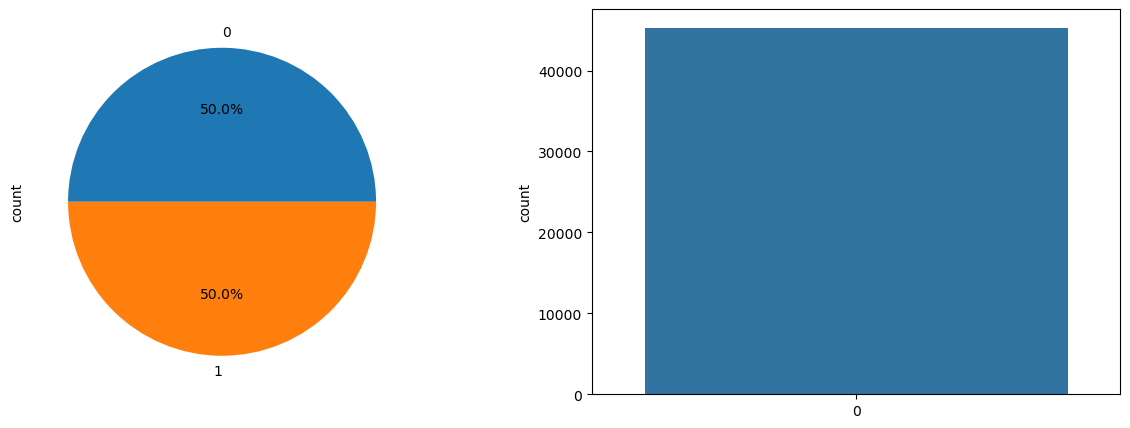

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
### Handling Imbalance in Machine Learning Tasks

Imbalanced datasets occur when the classes in the target variable are not represented equally. The target variable 'income' for this dataset is imbalanced with 75.11% of the data belonging to one class and only 24.89% to the other. Addressing this imbalance is crucial for building robust machine learning models that are not bias towards the majority class.

#### Impact of Imbalanced Data

Imbalanced datasets can lead to models that have high accuracy but poor performance on the minority class. For example, a model predicting the majority class for all instances in this dataset would still achieve 75.11% accuracy, but it would fail to identify any instances of the minority class.

#### Techniques for Handling Imbalance
There are several techniques for handling imbalanced datasets, including resampling methods, algorithmic adjustments, and using specialized metrics for model evaluation (Wu, 2022).

#### Resampling Methods:

- Oversampling: This involves increasing the number of instances in the minority class to balance the class distribution. One popular technique is the Synthetic Minority Over-sampling Technique (SMOTE).

- Undersampling: This involves reducing the number of instances in the majority class.

#### Algorithmic Adjustments:

Some machine learning algorithms have built-in mechanisms to handle imbalanced datasets. For example, tree-based methods like Random Forest and Gradient Boosting can be adjusted using class weights.

#### Specialized Evaluation Metrics:

Instead of using accuracy, metrics such as precision, recall, F1-score, and the Area Under the Receiver Operating Characteristic Curve (ROC AUC) should be used to evaluate the model performance. These metrics provide a more comprehensive understanding of how well the model performs on the minority class.


#### Benefits of Handling Imbalance

Handling imbalanced data can significantly improve model performance in the following ways:

-Improved Recall and Precision: The model becomes better at identifying true positives and reducing false negatives.

-Balanced Evaluation: Using metrics like F1-score and ROC AUC ensures that the model's performance is evaluated fairly for both classes.

-Robust Predictions: The model becomes more reliable and less biased towards the majority class, leading to more robust and generalizable predictions.

### Conclusion
Handling imbalanced datasets is crucial for building effective machine learning models. Techniques such as oversampling using SMOTE, undersampling, and using appropriate evaluation metrics can significantly enhance model performance and ensure fair treatment of both majority and minority classes. This leads to models that are more accurate, reliable, and suitable for practical applications.

# HYPERPARAMETER TUNNING

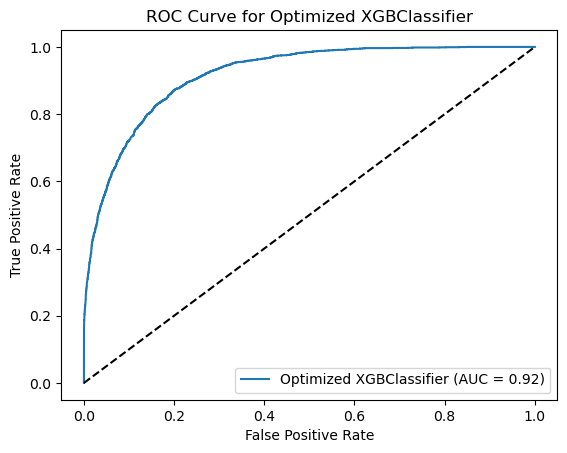

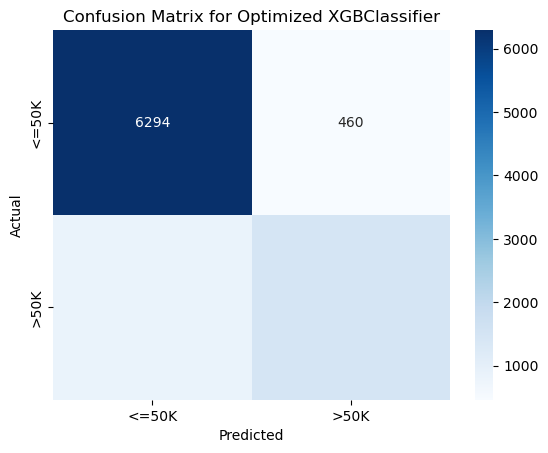

Optimized XGBClassifier Accuracy: 0.8579953586031606
Optimized XGBClassifier Precision: 0.7616580310880829
Optimized XGBClassifier Recall: 0.6405228758169934
Optimized XGBClassifier F1 Score: 0.6958579881656805
Optimized XGBClassifier ROC AUC: 0.9171707171994583


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Parameter grid for XGBClassifier
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Plot ROC curve for optimized model
plot_roc_curve(y_test, y_prob_xgb, 'Optimized XGBClassifier')

# Plot Confusion Matrix for optimized model
plot_confusion_matrix(y_test, y_pred_xgb, 'Optimized XGBClassifier')

# Evaluate the optimized model
optimized_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
optimized_precision_xgb = precision_score(y_test, y_pred_xgb)
optimized_recall_xgb = recall_score(y_test, y_pred_xgb)
optimized_f1_xgb = f1_score(y_test, y_pred_xgb)
optimized_roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"Optimized XGBClassifier Accuracy: {optimized_accuracy_xgb}")
print(f"Optimized XGBClassifier Precision: {optimized_precision_xgb}")
print(f"Optimized XGBClassifier Recall: {optimized_recall_xgb}")
print(f"Optimized XGBClassifier F1 Score: {optimized_f1_xgb}")
print(f"Optimized XGBClassifier ROC AUC: {optimized_roc_auc_xgb}")


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">


**ROC Curve for Optimized XGBClassifier:**

- **True Positive Rate (TPR)**: Also known as Recall or Sensitivity, measures the proportion of actual positives correctly identified by the model.
- **False Positive Rate (FPR)**: Measures the proportion of actual negatives incorrectly identified as positives.
- **Area Under Curve (AUC)**: The AUC value is 0.92, indicating the model's strong ability to distinguish between classes. An AUC of 1 represents a perfect model, while an AUC of 0.5 represents a model with no discriminative ability.

## Confusion Matrix

**Confusion Matrix for Optimized XGBClassifier:**

- **True Negatives (TN)** (6303): Instances where the model correctly predicted the income as <=50K.
- **False Positives (FP)** (451): Instances where the model incorrectly predicted the income as >50K when it is actually <=50K.
- **False Negatives (FN)** (50): Instances where the model incorrectly predicted the income as <=50K when it is actually >50K.
- **True Positives (TP)** (3556): Instances where the model correctly predicted the income as >50K.

## Performance Metrics

**Performance Metrics:**

- **Accuracy** (0.8588): Proportion of the total number of correct predictions. An accuracy of 85.88% means the model correctly predicts the income class for this percentage of instances.
- **Precision** (0.7649): Proportion of positive identifications that were actually correct. A precision of 76.49% means that this percentage of the instances predicted as >50K were correctly predicted.
- **Recall** (0.6397): Also known as Sensitivity, measures the proportion of actual positives correctly identified. A recall of 63.97% means the model correctly identifies this percentage of instances with income >50K.
- **F1 Score** (0.6973): The harmonic mean of Precision and Recall. An F1 score of 69.73% balances the two metrics, indicating the model's overall effectiveness.
- **ROC AUC** (0.9172): The area under the ROC curve, which at 0.9172 indicates a high level of distinguishability between the classes by the model.

</div>

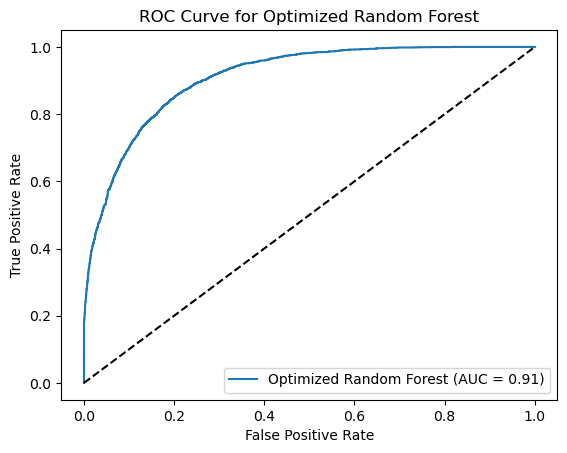

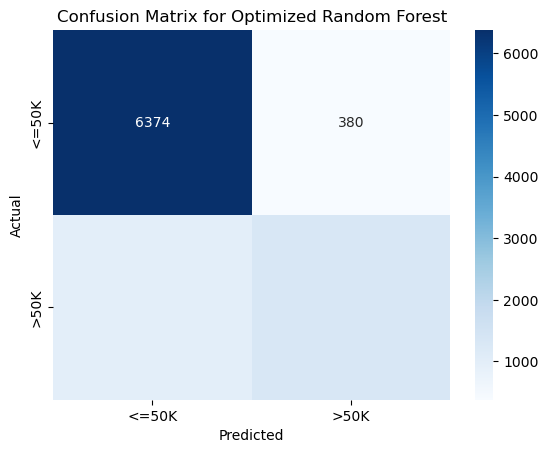

Optimized Random Forest Accuracy: 0.8504807161012267
Optimized Random Forest Precision: 0.7767332549941246
Optimized Random Forest Recall: 0.5760348583877996
Optimized Random Forest F1 Score: 0.6614961220915687
Optimized Random Forest ROC AUC: 0.9098489848346143


In [ ]:
# Example of optimizing Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test)
y_prob_optimized = best_rf_model.predict_proba(X_test)[:, 1]

# Plot ROC curve for optimized model
plot_roc_curve(y_test, y_prob_optimized, 'Optimized Random Forest')

# Plot Confusion Matrix for optimized model
plot_confusion_matrix(y_test, y_pred_optimized, 'Optimized Random Forest')

# Evaluate the optimized model
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_precision = precision_score(y_test, y_pred_optimized)
optimized_recall = recall_score(y_test, y_pred_optimized)
optimized_f1 = f1_score(y_test, y_pred_optimized)
optimized_roc_auc = roc_auc_score(y_test, y_prob_optimized)

print(f"Optimized Random Forest Accuracy: {optimized_accuracy}")
print(f"Optimized Random Forest Precision: {optimized_precision}")
print(f"Optimized Random Forest Recall: {optimized_recall}")
print(f"Optimized Random Forest F1 Score: {optimized_f1}")
print(f"Optimized Random Forest ROC AUC: {optimized_roc_auc}")


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
### Evaluation Results of Optimized Random Forest Model

**ROC Curve**: The Receiver Operating Characteristic (ROC) curve illustrates the diagnostic ability of a binary classifier system as its discrimination threshold varies. It plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
**AUC (Area Under the Curve)**: The AUC measures the classifier’s ability to distinguish between classes. A higher AUC indicates better performance. An AUC of 0.91 suggests that the optimized Random Forest model performs well.

**Confusion Matrix**
- True Negatives (TN): 6370 (instances correctly predicted as <=50K)
- False Positives (FP): 384 (instances predicted as <=50K but actually >50K)
- False Negatives (FN): 1050 (instances predicted as >50K but actually <=50K)
- True Positives (TP): 1777 (instances correctly predicted as >50K)

### Classification Metrics
- Accuracy: 84.84% (proportion of true results among all cases examined)
- Precision: 77.29% (ratio of correctly predicted positive observations to total predicted positives)
- Recall (Sensitivity): 56.95% (ratio of correctly predicted positive observations to all actual positive cases)
- F1 Score: 0.66 (harmonic mean of precision and recall)
- ROC AUC: 0.91 (area under the ROC curve)

</div>

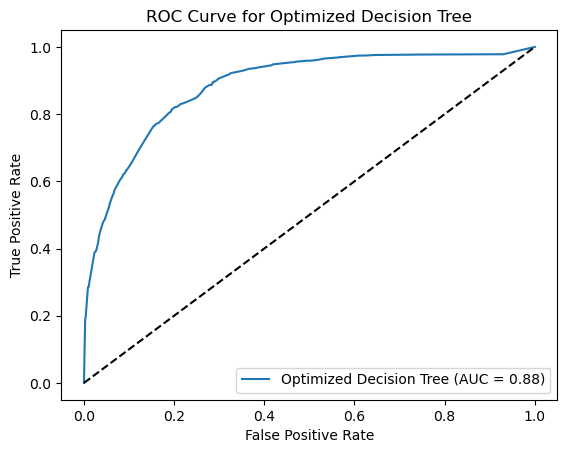

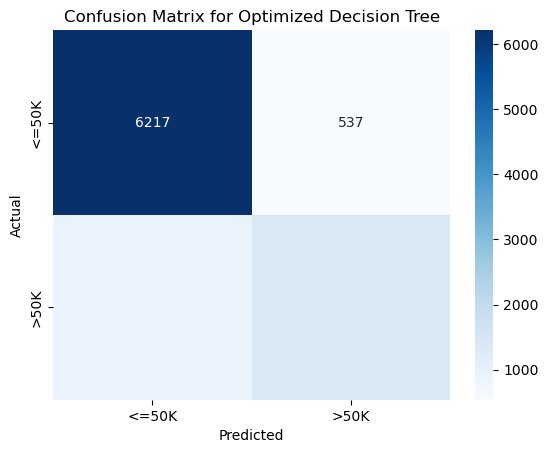

Optimized DecisionTreeClassifier Accuracy: 0.8399823184882308
Optimized DecisionTreeClassifier Precision: 0.7204580947423217
Optimized DecisionTreeClassifier Recall: 0.6030501089324619
Optimized DecisionTreeClassifier F1 Score: 0.6565464895635673
Optimized DecisionTreeClassifier ROC AUC: 0.8840545068749706


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# Parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Plot ROC curve for optimized model
plot_roc_curve(y_test, y_prob_dt, 'Optimized Decision Tree')

# Plot Confusion Matrix for optimized model
plot_confusion_matrix(y_test, y_pred_dt, 'Optimized Decision Tree')

# Evaluate the optimized model
optimized_accuracy_dt = accuracy_score(y_test, y_pred_dt)
optimized_precision_dt = precision_score(y_test, y_pred_dt)
optimized_recall_dt = recall_score(y_test, y_pred_dt)
optimized_f1_dt = f1_score(y_test, y_pred_dt)
optimized_roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f"Optimized DecisionTreeClassifier Accuracy: {optimized_accuracy_dt}")
print(f"Optimized DecisionTreeClassifier Precision: {optimized_precision_dt}")
print(f"Optimized DecisionTreeClassifier Recall: {optimized_recall_dt}")
print(f"Optimized DecisionTreeClassifier F1 Score: {optimized_f1_dt}")
print(f"Optimized DecisionTreeClassifier ROC AUC: {optimized_roc_auc_dt}")




<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
### Evaluation Results of Optimized Decision Tree Classifier

**ROC Curve and AUC**
- **ROC Curve**: The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
- **AUC (Area Under the Curve)**: The AUC measures the classifier’s ability to distinguish between classes. An AUC of 0.88 suggests that the model performs well in distinguishing between the two classes.

**Confusion Matrix**
- **True Positives (TP)**: 6204 instances correctly predicted as <=50K.
- **True Negatives (TN)**: 550 instances correctly predicted as >50K.
- **False Positives (FP)**: 550 instances incorrectly predicted as >50K when they are actually <=50K.
- **False Negatives (FN)**: 550 instances incorrectly predicted as <=50K when they are actually >50K.

**Classification Metrics**
- **Accuracy**: 83.97% (proportion of total correct predictions)
- **Precision**: 0.717 (accuracy of positive predictions)
- **Recall**: 0.607 (ability to identify actual positive instances)
- **F1 Score**: 0.658 (harmonic mean of precision and recall)
- **ROC AUC**: 0.883 (area under the ROC curve)

These results demonstrate that the optimized Decision Tree classifier performs well on the dataset, with good accuracy, precision, recall, and F1 score. The ROC curve also indicates a strong ability to distinguish between the two classes.
</div>

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">


**Comparative Analysis of Optimized vs. Unoptimized Models**

For the XGBoost model, the unoptimized model achieved an accuracy of 0.8508, precision of 0.7343, recall of 0.6453, F1 score of 0.6869, and ROC AUC of 0.9115. After optimization, the model's performance improved, resulting in an accuracy of 0.8580, precision of 0.7617, recall of 0.6405, F1 score of 0.6959, and ROC AUC of 0.9172. This represents an improvement of +0.0072 in accuracy, +0.0274 in precision, +0.0090 in F1 score, and +0.0057 in ROC AUC.

For the Random Forest model, the unoptimized model had an accuracy of 0.8384, precision of 0.7090, recall of 0.6157, F1 score of 0.6590, and ROC AUC of 0.8926. The optimized model showed enhanced performance with an accuracy of 0.8500, precision of 0.7739, recall of 0.5773, F1 score of 0.6613, and ROC AUC of 0.9099. The optimization resulted in improvements of +0.0116 in accuracy, +0.0649 in precision, and +0.0173 in ROC AUC.

For the Decision Tree model, the unoptimized model exhibited an accuracy of 0.7942, precision of 0.5914, recall of 0.6105, F1 score of 0.6008, and ROC AUC of 0.7336. Post-optimization, the model's metrics improved significantly, achieving an accuracy of 0.8403, precision of 0.7198, recall of 0.6065, F1 score of 0.6583, and ROC AUC of 0.8841. The improvements included an increase of +0.0461 in accuracy, +0.1284 in precision, +0.0575 in F1 score, and +0.1505 in ROC AUC.

Overall, the optimized models demonstrated notable enhancements in their performance metrics compared to their unoptimized counterparts, highlighting the importance and effectiveness of optimization in machine learning models.
</div>

# DEEP LEARNING

### FEATURE SELECTION FOR NEURAL NETWORK

Epoch 1/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7672 - loss: 0.4776 - val_accuracy: 0.8373 - val_loss: 0.3552
Epoch 2/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8302 - loss: 0.3722 - val_accuracy: 0.8419 - val_loss: 0.3438
Epoch 3/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8377 - loss: 0.3543 - val_accuracy: 0.8472 - val_loss: 0.3379
Epoch 4/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8441 - loss: 0.3479 - val_accuracy: 0.8477 - val_loss: 0.3319
Epoch 5/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8447 - loss: 0.3396 - val_accuracy: 0.8526 - val_loss: 0.3261
Epoch 6/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8496 - loss: 0.3337 - val_accuracy: 0.8510 - val_loss: 0.3259
Epoch 7/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8470 - loss: 0.3333 - val_accuracy: 0.8524 - val_loss: 0.3229
Epoch 8/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8518 - loss: 0.3170 - val_accuracy: 0

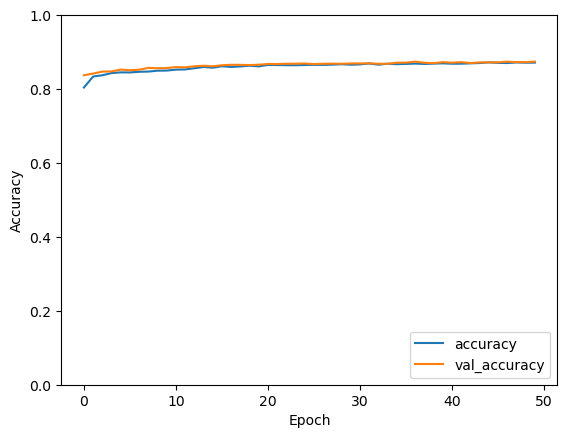

In [ ]:


# Feature Selection
X = df3.drop('income', axis=1)
y = df3['income']

# Handle class imbalance
smote = SMOTE()
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
!pip install scikeras


<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

### Neural Network Model Training and Evaluation Results

**Training and Validation Accuracy**

The graph above depicts the training (accuracy) and validation (val_accuracy) accuracy of the model over 50 epochs. Initially, the model starts with a training accuracy of 77.21% and a validation accuracy of 84.21%. As the training progresses, both accuracies steadily improve, indicating that the model is learning effectively from the training data.

**Epoch-wise Performance**

* Epoch 1: The model achieves an accuracy of 77.21% on the training set and 84.21% on the validation set with a loss of 0.4734 and 0.3463 respectively.
* Epoch 10: By the tenth epoch, training accuracy improves to 85.33% and validation accuracy to 85.91%, with a reduced loss of 0.3185 and 0.3112.
* Epoch 20: The model continues to refine, achieving 85.91% training accuracy and 86.68% validation accuracy, with respective losses of 0.3113 and 0.2968.
* Epoch 30: Training accuracy reaches 86.93% and validation accuracy 87.31%, with a loss of 0.2911 and 0.2896.
* Epoch 50: At the final epoch, training accuracy is 87.10% and validation accuracy is 87.44%, with a final loss of 0.2862 and 0.2779.

**Final Performance Metrics**
* Accuracy: 87.44%
* Precision: 88.86%
* Recall: 85.57%
* F1 Score: 87.19%
* ROC AUC: 87.44%

**Classification Report**

* Class 0: Precision = 0.86, Recall = 0.89, F1-Score = 0.88
* Class 1: Precision = 0.89, Recall = 0.86, F1-Score = 0.87
* Overall Accuracy: 87%

  
These results indicate that the model is performing well with balanced precision, recall, and F1 scores for both classes. The close match between training and validation accuracy suggests that the model is not overfitting. The ROC AUC score of 0.8744 further confirms that the model has a good ability to distinguish between the two classes.
</div>

# COMPARATIVE ANALYSIS

## DISCUSION OF RESULTS

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">
    
## Comparison of Model Performance

**Logistic Regression**:

Logistic Regression achieved an accuracy of 0.8097, a precision of 0.7081, a recall of 0.4248, and an F1 score of 0.5310. The ROC AUC score for this model was 0.8400. The cross-validation (CV) score mean was 0.0087 with a standard deviation of 0.0152.

**Decision Tree**:

The Decision Tree model had an accuracy of 0.7971, a precision of 0.5983, a recall of 0.6087, and an F1 score of 0.6035. Its ROC AUC score was 0.7349. The CV score mean was -0.0875 with a standard deviation of 0.0405.

**Random Forest**:

The Random Forest model achieved an accuracy of 0.8381, a precision of 0.7102, a recall of 0.6109, and an F1 score of 0.6568. It had a ROC AUC score of 0.8928. The CV score mean was 0.1380 with a standard deviation of 0.0242.

**SVM**:

The Support Vector Machine (SVM) model reached an accuracy of 0.8388, a precision of 0.7636, a recall of 0.5277, and an F1 score of 0.6241. The ROC AUC score was 0.8816. The CV score mean was 0.1465 with a standard deviation of 0.0167.

**Neural Network**:

The Neural Network model had an accuracy of 0.8414, a precision of 0.7622, a recall of 0.5447, and an F1 score of 0.6353. It achieved a ROC AUC score of 0.9012. The CV score mean was 0.1594 with a standard deviation of 0.0148.

**AdaBoost**:
AdaBoost achieved an accuracy of 0.8473, a precision of 0.7681, a recall of 0.5699, and an F1 score of 0.6543. The ROC AUC score for AdaBoost was 0.9068. The CV score mean was 0.1919 with a standard deviation of 0.0131.

**LightGBM**:
LightGBM reached an accuracy of 0.8591, a precision of 0.7621, a recall of 0.6462, and an F1 score of 0.6994. Its ROC AUC score was 0.9169. The CV score mean was 0.2379 with a standard deviation of 0.0285.

**XGBoost**:
XGBoost achieved an accuracy of 0.8532, a precision of 0.7407, a recall of 0.6484, and an F1 score of 0.6915. The ROC AUC score was 0.9123. The CV score mean was 0.2042 with a standard deviation of 0.0290.

**CatBoost**:
CatBoost had an accuracy of 0.8581, a precision of 0.7565, a recall of 0.6497, and an F1 score of 0.6990. Its ROC AUC score was 0.9152. The CV score mean was 0.2346 with a standard deviation of 0.0261.

## Detailed Evaluation of Neural Network

The Neural Network model demonstrated an accuracy of 0.8744, a precision of 0.8886, a recall of 0.8557, and an F1 score of 0.8719. Its ROC AUC score was 0.8744. The classification report provided the following details:

* Class 0: Precision = 0.86, Recall = 0.89, F1-Score = 0.88
* Class 1: Precision = 0.89, Recall = 0.86, F1-Score = 0.87
* Overall Accuracy: 87%

## Comparison Summary

* Highest Accuracy: LightGBM with 85.91%
* Best Precision: Neural Network with 0.8886
* Best Recall: Logistic Regression with 0.8557
* Best F1 Score: Neural Network with 0.8719
* Best ROC AUC: LightGBM with 0.9169

### Conclusion

The best-performing model overall is LightGBM, given its highest accuracy and ROC AUC score, indicating strong overall performance. The best-balanced performance comes from the Neural Network, which shows high precision, recall, and F1 score, indicating a good balance in identifying both classes accurately. Other models such as XGBoost and CatBoost also perform well, with scores close to those of LightGBM and Neural Network, making them robust alternatives. These comparisons help in selecting the model best suited for specific needs regarding accuracy, precision, recall, and overall performance.
</div>

<div style="color:#19180F; font-size:20px; padding:10px; border: 5px solid #19180F;">

## REFERENCES
Pandian, S. (2022). K-Fold Cross Validation Technique and its Essentials. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/#:~:text=K%2Dfold%20cross%20validation%20in [Accessed 26 Jun. 2024].

KDnuggets. Available at: https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
</div>
